In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
csv = "GDL_2019_summary.CSV"
metric = "O3"
display_graphs = True
df = pd.read_csv(csv,encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163604 entries, 0 to 1163603
Data columns (total 17 columns):
FECHA              1163604 non-null object
HORA               1163604 non-null int64
air_station        1163604 non-null object
bike_station_id    1163604 non-null int64
trips              1163604 non-null int64
trip_distance      1163604 non-null float64
trip_duration      1163604 non-null float64
CO                 883299 non-null float64
NO                 622724 non-null float64
NO2                627028 non-null float64
NOX                627112 non-null float64
O3                 715470 non-null float64
PM 2.5             3456 non-null float64
PM10               681353 non-null float64
SO2                699370 non-null float64
estacion           883299 non-null object
CO_MEAN            883299 non-null float64
dtypes: float64(11), int64(3), object(3)
memory usage: 150.9+ MB


In [4]:
df.describe()

HORA  bike_station_id         trips  trip_distance  \
count  1.163604e+06     1.163604e+06  1.163604e+06   1.163604e+06   
mean   1.424578e+01     1.421220e+02  3.958481e+00   7.518556e+03   
std    4.814280e+00     8.925700e+01  4.064948e+00   8.727936e+03   
min    0.000000e+00     2.000000e+00  1.000000e+00   0.000000e+00   
25%    1.000000e+01     5.800000e+01  1.000000e+00   2.402800e+03   
50%    1.400000e+01     1.530000e+02  3.000000e+00   5.066200e+03   
75%    1.800000e+01     2.190000e+02  5.000000e+00   9.667300e+03   
max    2.300000e+01     2.960000e+02  1.530000e+02   4.784530e+05   

       trip_duration             CO             NO            NO2  \
count   1.163604e+06  883299.000000  622724.000000  627028.000000   
mean    1.921656e+03       0.751670       0.015138       0.014255   
std     3.151870e+05       0.490315       0.022470       0.013927   
min    -1.116267e+08       0.007000       0.000000       0.000000   
25%     8.300000e+02       0.432330       0.004000       0.005000   
50%     1.740000e+03       0.603326       0.009000       0.010000   
75%     3.408000e+03       1.027000       0.014000       0.019000   
max     1.815094e+07       5.722000       0.254000       0.133000   

                 NOX             O3       PM 2.5           PM10  \
count  627112.000000  715470.000000  3456.000000  681353.000000   
mean        0.029279       0.033891    10.808375      36.378339   
std         0.032817       0.021449     4.992803      22.414873   
min         0.000000       0.000000     3.170000       0.000000   
25%         0.012000       0.018000     6.580000      21.750000   
50%         0.018000       0.032000     9.890000      32.160000   
75%         0.031000       0.047000    15.000000      45.600000   
max         0.337000       0.210000    23.070000     442.080000   

                 SO2        CO_MEAN  
count  699370.000000  883299.000000  
mean        0.002764       0.741121  
std         0.001854       0.359970  
min         0.000000       0.266473  
25%         0.001600       0.455636  
50%         0.002100       0.638825  
75%         0.003700       0.897259  
max         0.013500       1.623480

In [5]:
df.isnull().sum()

FECHA                    0
HORA                     0
air_station              0
bike_station_id          0
trips                    0
trip_distance            0
trip_duration            0
CO                  280305
NO                  540880
NO2                 536576
NOX                 536492
O3                  448134
PM 2.5             1160148
PM10                482251
SO2                 464234
estacion            280305
CO_MEAN             280305
dtype: int64

In [6]:
df = df[df[metric].notnull()]

In [7]:
features = df[['trips', 'trip_distance', 'trip_duration','HORA']]
label = df[[metric]]

In [8]:
features.head()

trips  trip_distance  trip_duration  HORA
1       2         5333.4         1500.0     6
2       3         4216.6         3900.0     6
3       1         1137.8          300.0     6
4       3         9786.4         2820.0     6
25      2         3934.9         1020.0     6

In [9]:
label.head()

O3
1   0.002
2   0.002
3   0.002
4   0.002
25  0.003

In [10]:
#scale numerical features, not the label
scaler = MinMaxScaler()
features[features.columns] = scaler.fit_transform(features[features.columns])

<ipython-input-10-eec10b5288a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[features.columns] = scaler.fit_transform(features[features.columns])
C:\Users\nxa19423\ONEDRI~1\CIM\ML\ml_env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
features.head()

trips  trip_distance  trip_duration     HORA
1   0.006579       0.011147       0.860150  0.26087
2   0.013158       0.008813       0.860168  0.26087
3   0.000000       0.002378       0.860140  0.26087
4   0.013158       0.020454       0.860160  0.26087
25  0.006579       0.008224       0.860146  0.26087

In [12]:
data_set = features
data_set['label'] = label
data_set.head()

<ipython-input-12-6eadf0350739>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['label'] = label


trips  trip_distance  trip_duration     HORA  label
1   0.006579       0.011147       0.860150  0.26087  0.002
2   0.013158       0.008813       0.860168  0.26087  0.002
3   0.000000       0.002378       0.860140  0.26087  0.002
4   0.013158       0.020454       0.860160  0.26087  0.002
25  0.006579       0.008224       0.860146  0.26087  0.003

In [13]:
train, test = train_test_split(data_set, test_size=0.2)
test.sort_values(by='trips', ascending=False, inplace=True) #just for visualization purposes
test.head()

<ipython-input-13-f65d31acd34e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by='trips', ascending=False, inplace=True) #just for visualization purposes


trips  trip_distance  trip_duration      HORA  label
129149  0.598684       0.573251       0.860704  0.782609  0.029
178566  0.519737       0.532565       0.860753  0.782609  0.037
59942   0.493421       0.512568       0.860658  0.826087  0.037
443549  0.473684       0.516353       0.860591  0.826087  0.060
335086  0.473684       0.468531       0.860586  0.782609  0.053

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train.drop('label', axis=1), train['label'])

# Make predictions using the testing set
y_pred = regr.predict(test.drop('label', axis=1))

In [15]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test['label'], y_pred)) #y_hat
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test['label'], y_pred))

Coefficients: 
 [ 0.05897445 -0.09565875 -0.00542342  0.02099509]
Mean squared error: 0.00
Coefficient of determination: 0.05


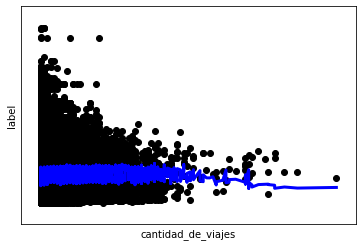

In [16]:
# Plot outputs
plt.scatter(test['trips'], test['label'],  color='black')
plt.plot(test['trips'], y_pred , color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('cantidad_de_viajes')
plt.ylabel('label')
plt.show()

In [17]:
test = test.sort_index(axis = 0) 

In [18]:
#new prediction
y_pred = regr.predict(test.drop('label', axis=1))

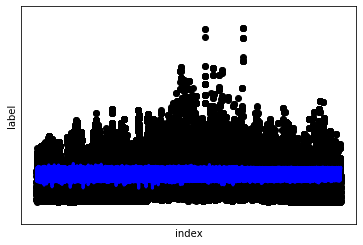

In [19]:
# Plot outputs
plt.scatter(test.index, test['label'],  color='black')
plt.plot(test.index, y_pred , color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('index')
plt.ylabel('label')
plt.show()

----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 0.05897445 -0.09565875 -0.00542342  0.02099509]
Mean squared error: 0.00044
Coefficient of determination: 0.04525


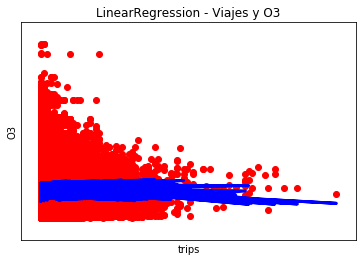

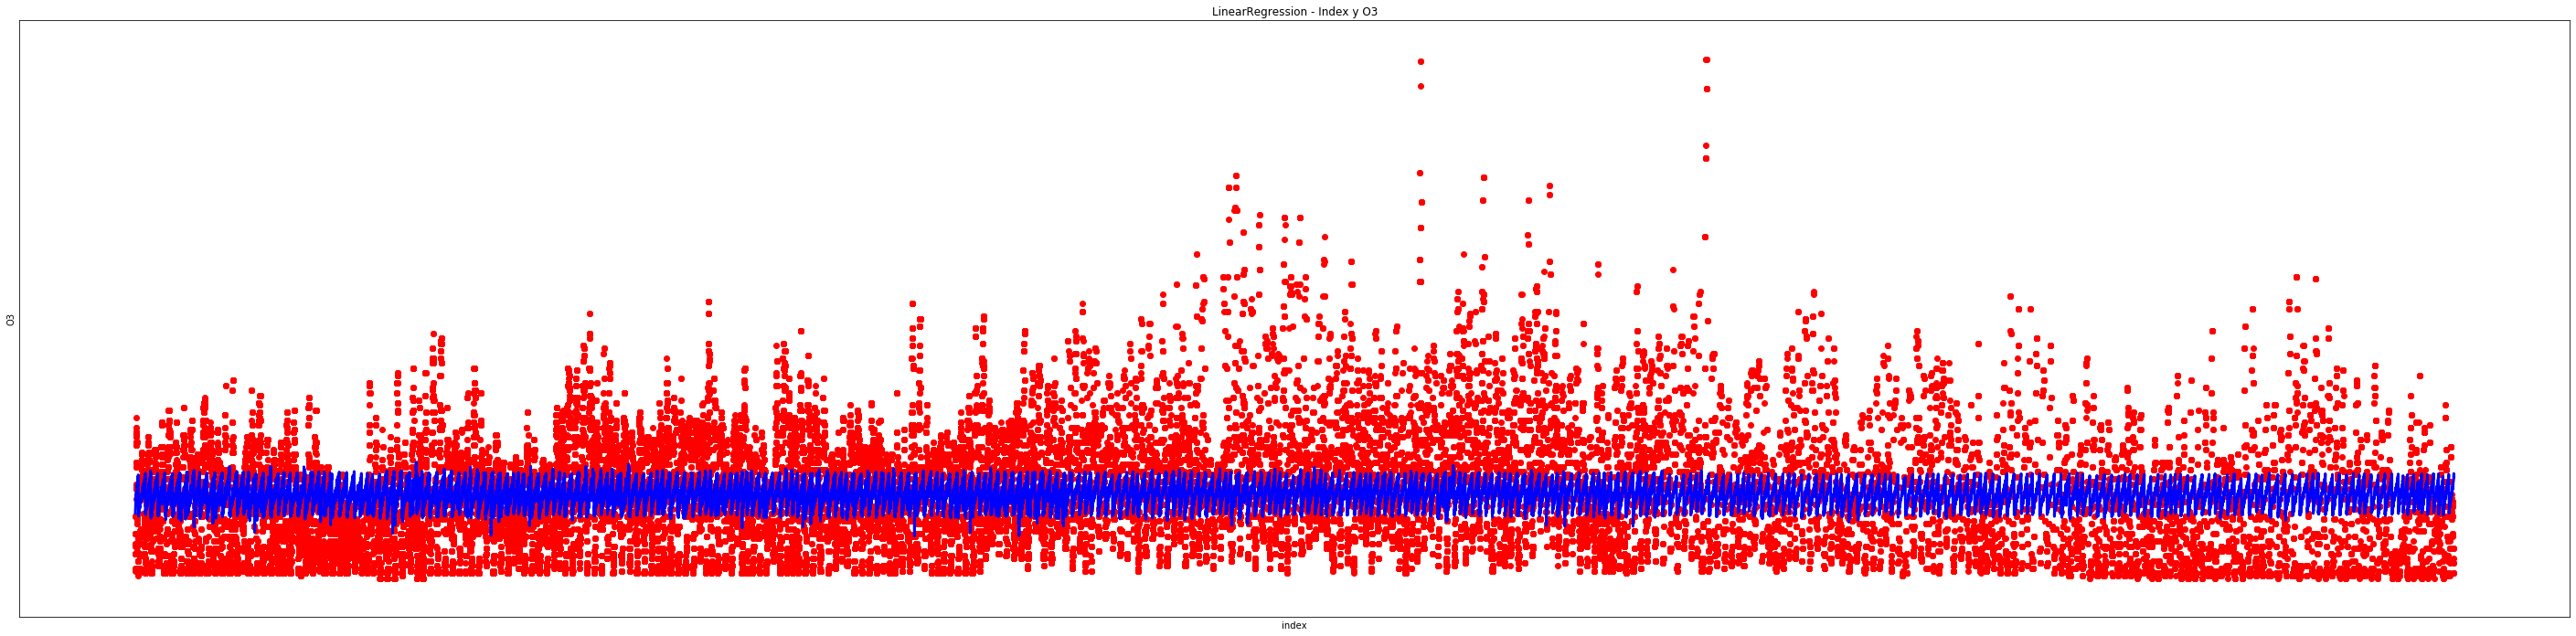

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.00045
Coefficient of determination: 0.01732


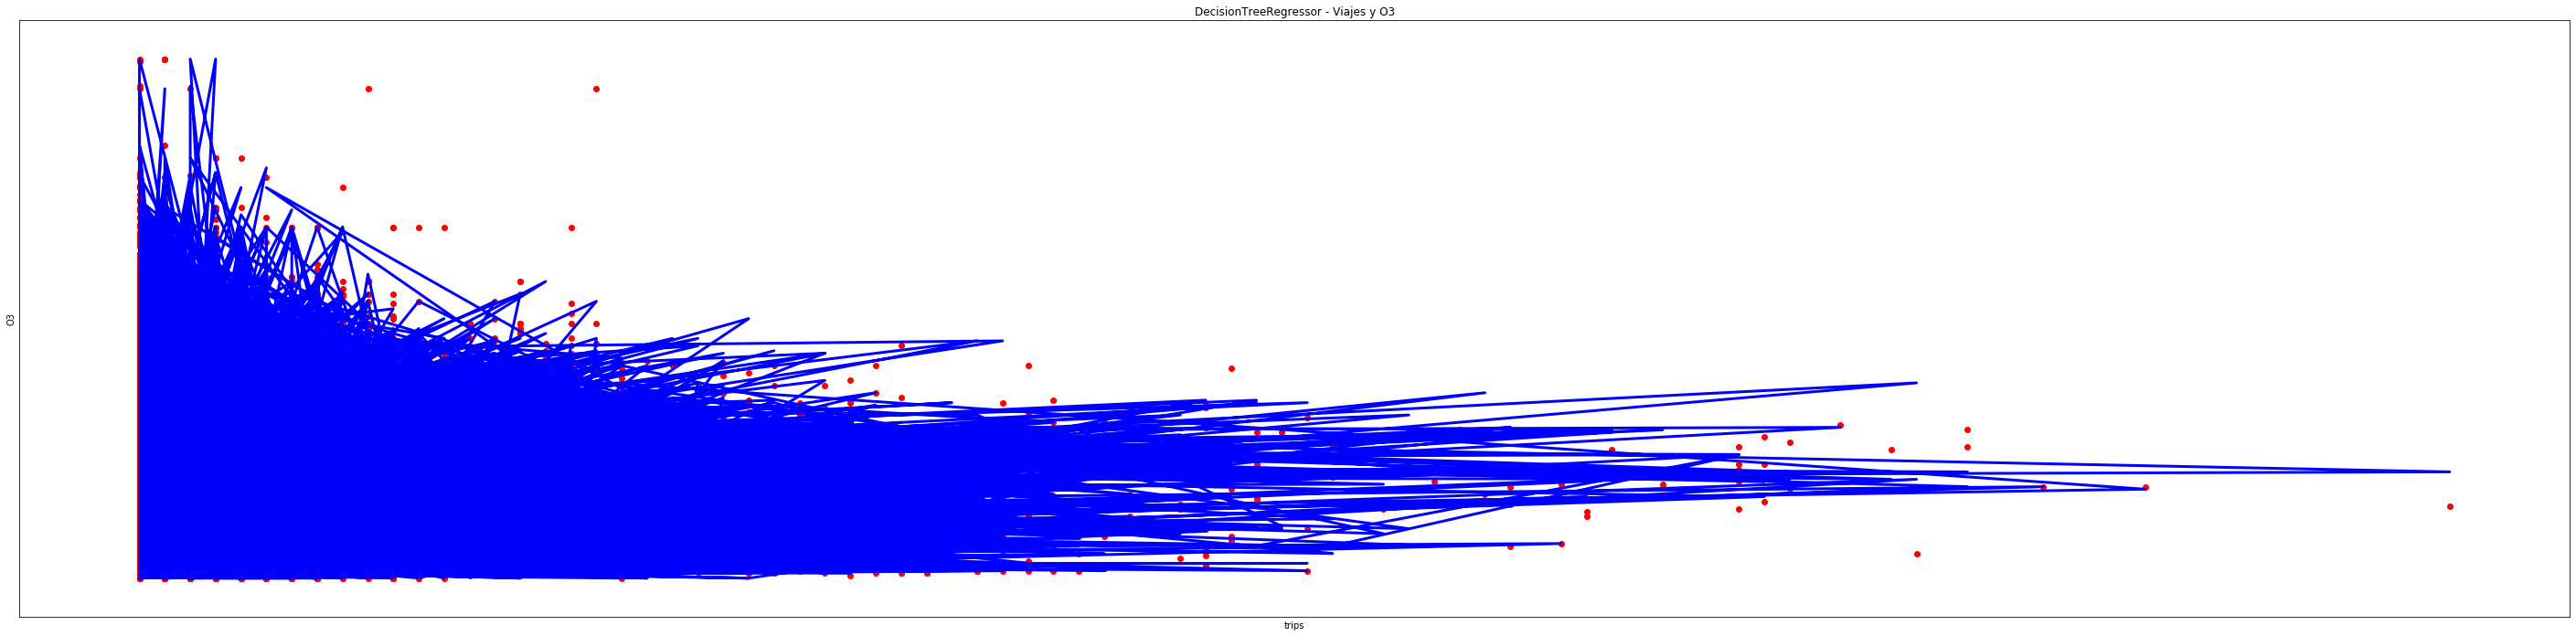

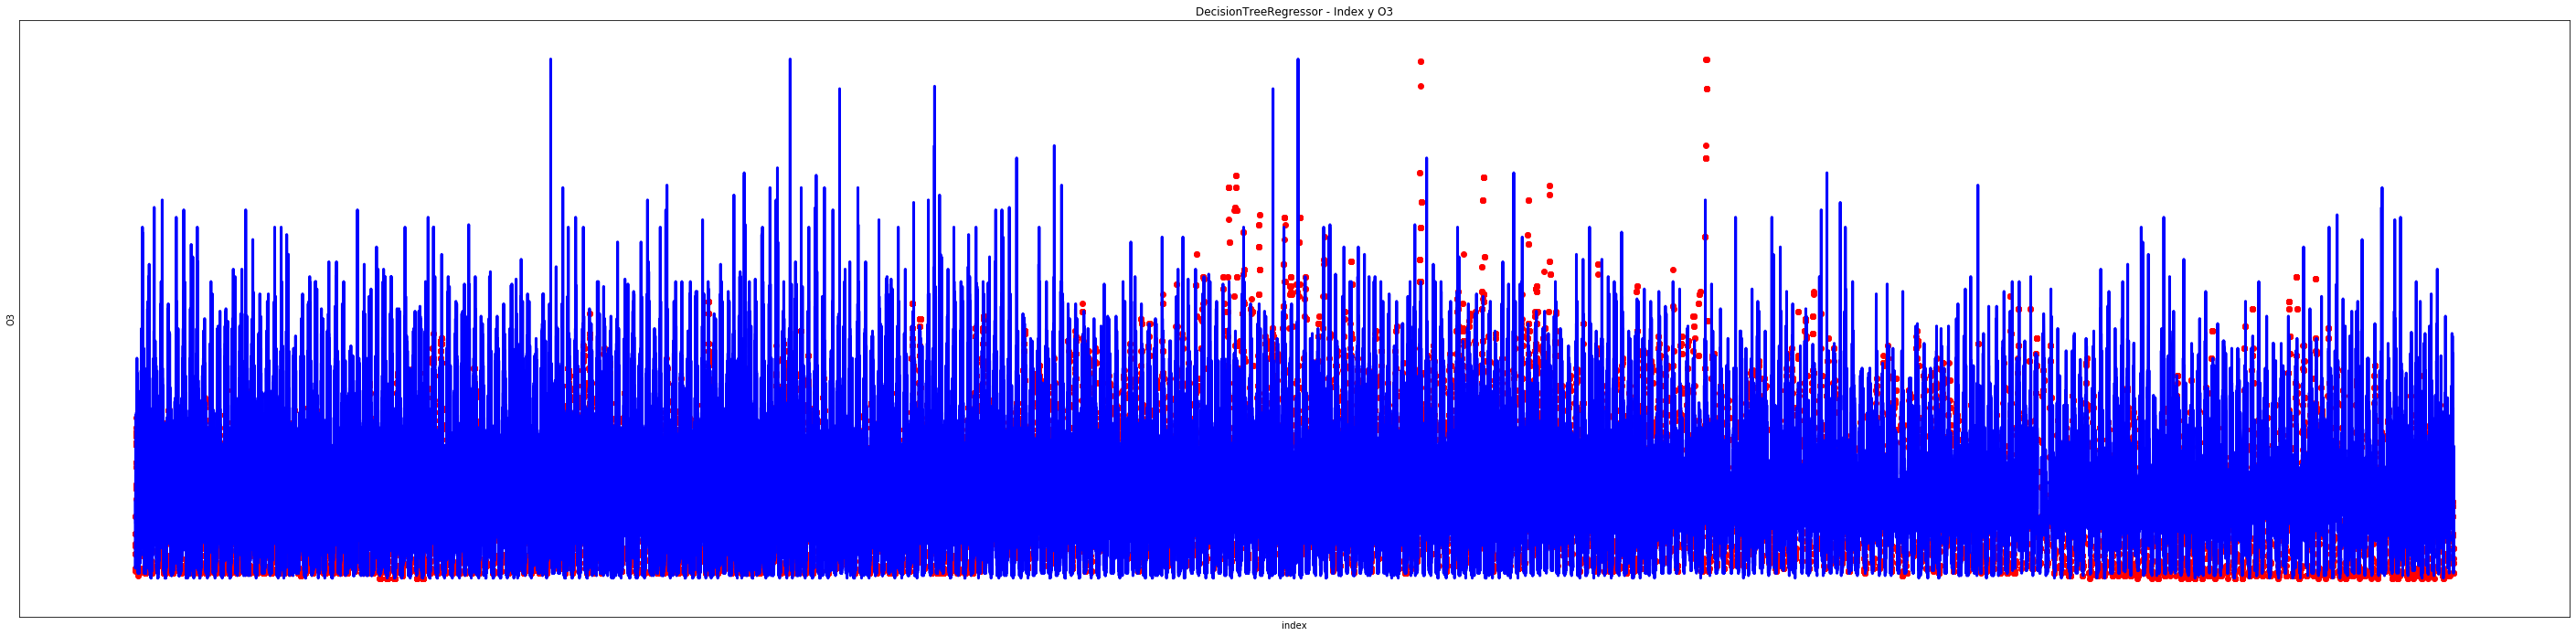

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 0.00024
Coefficient of determination: 0.48595


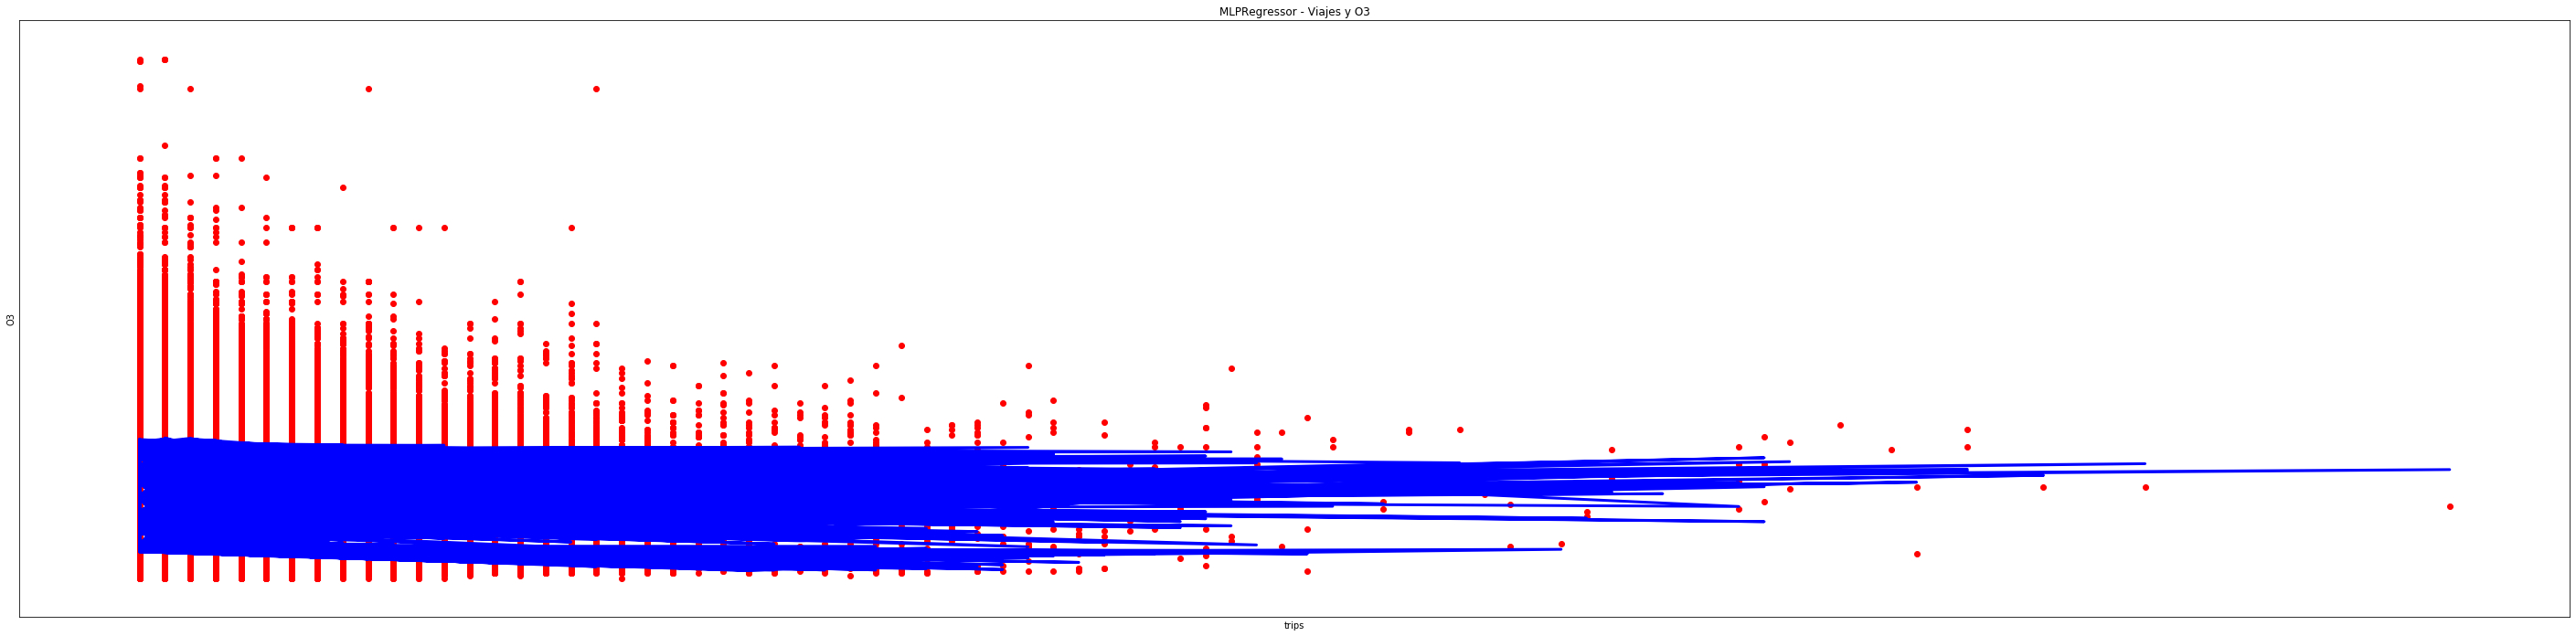

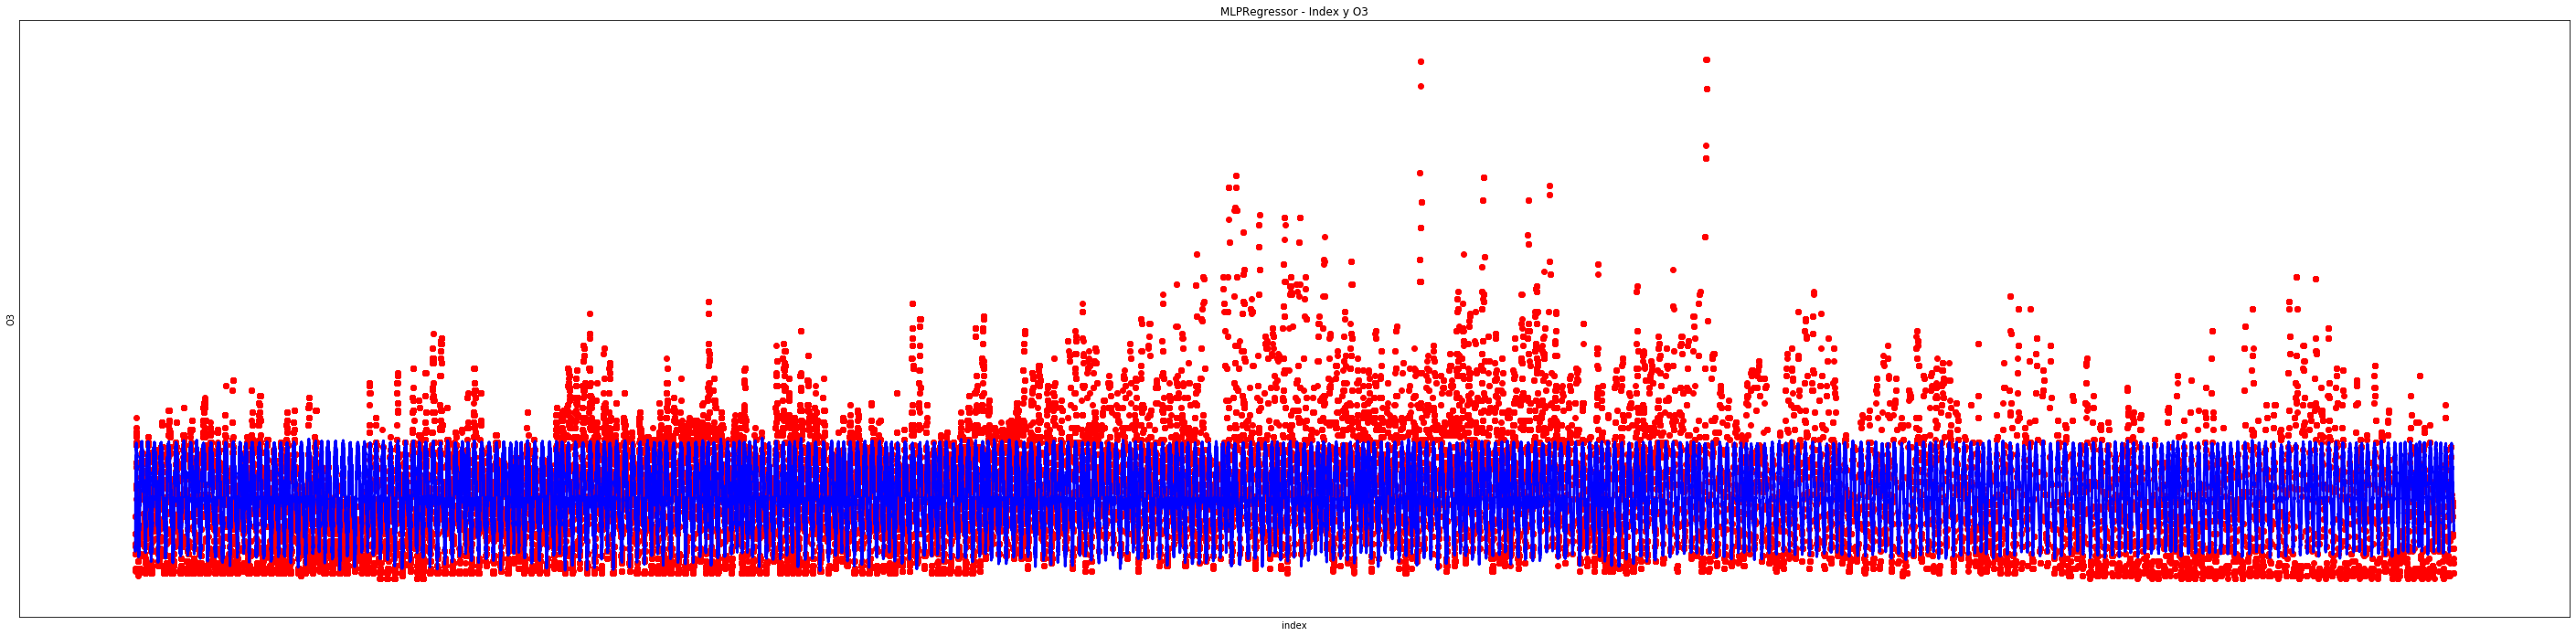

In [20]:
models = []
models.append(('LinearRegression', linear_model.LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
results = []
names = []
for name, model in models:
    model.fit(train.drop('label', axis=1), train['label'])
    y_pred = model.predict(test.drop('label', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', regr.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test['label'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test['label'], y_pred))
    plt.scatter(test['trips'], test['label'],  color='red')
    plt.plot(test['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel(metric)
    plt.title(name + ' - Viajes y ' + metric)
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test = test.sort_index(axis = 0) 
    y_pred = model.predict(test.drop('label', axis=1))
    # Plot outputs
    plt.scatter(test.index, test['label'],  color='red')
    plt.plot(test.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel(metric)
    plt.title(name + ' - Index y ' + metric)
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

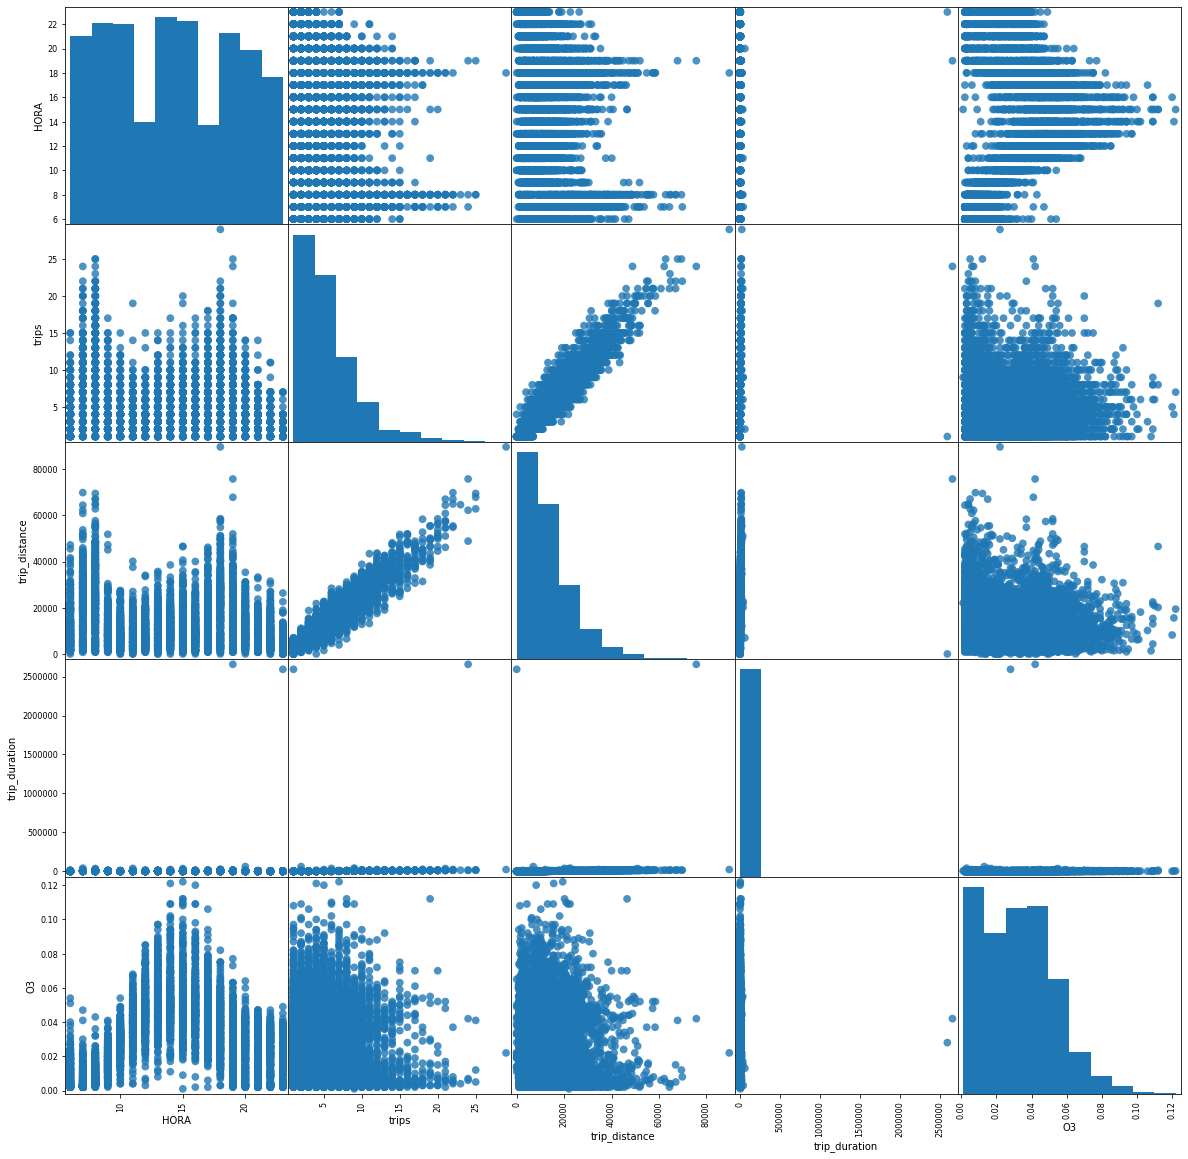

<ipython-input-30-2dd9955e0e97>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
157 Coefficients: 
 [ 0.05897445 -0.09565875 -0.00542342  0.02099509]
157 Mean squared error: 0.00036
157 Coefficient of determination: 0.07089


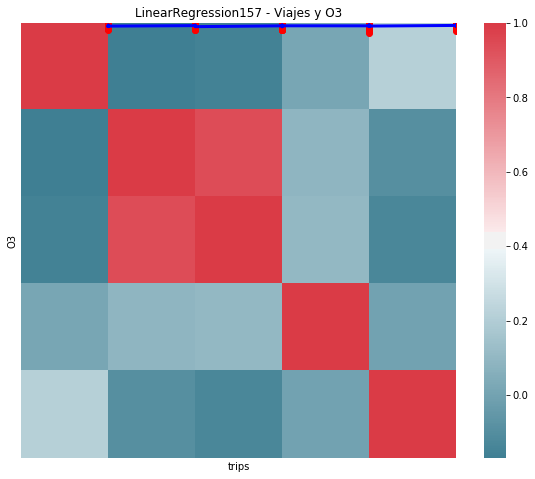

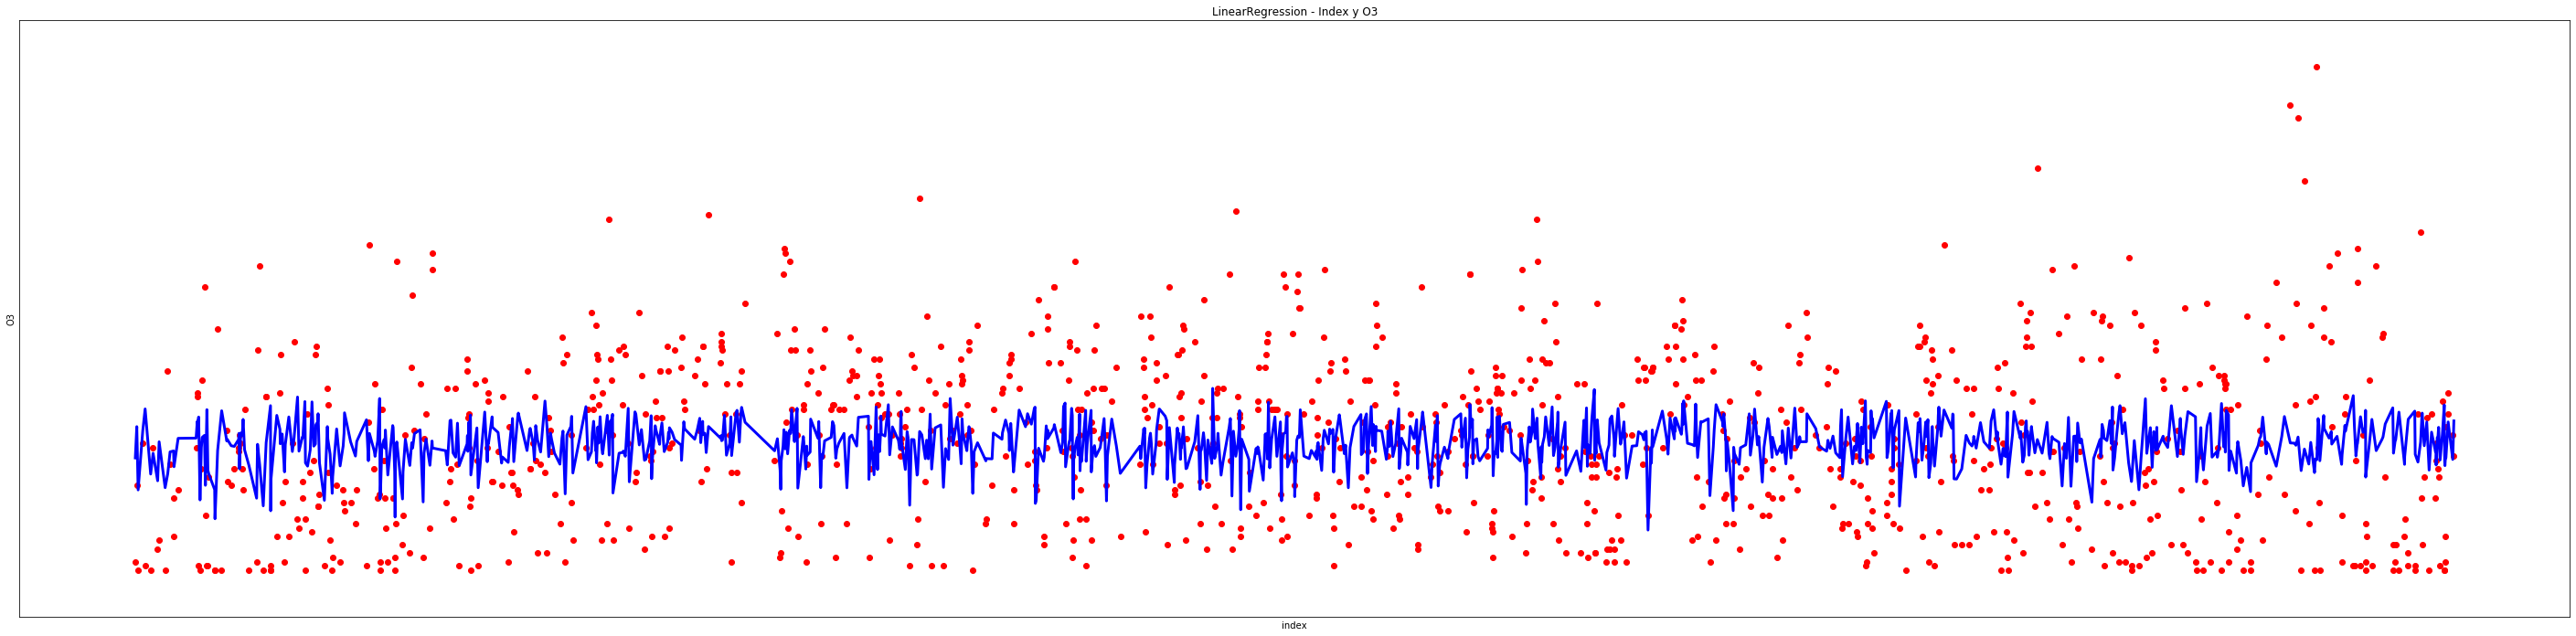

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
157 Mean squared error: 0.00035
157 Coefficient of determination: 0.11335


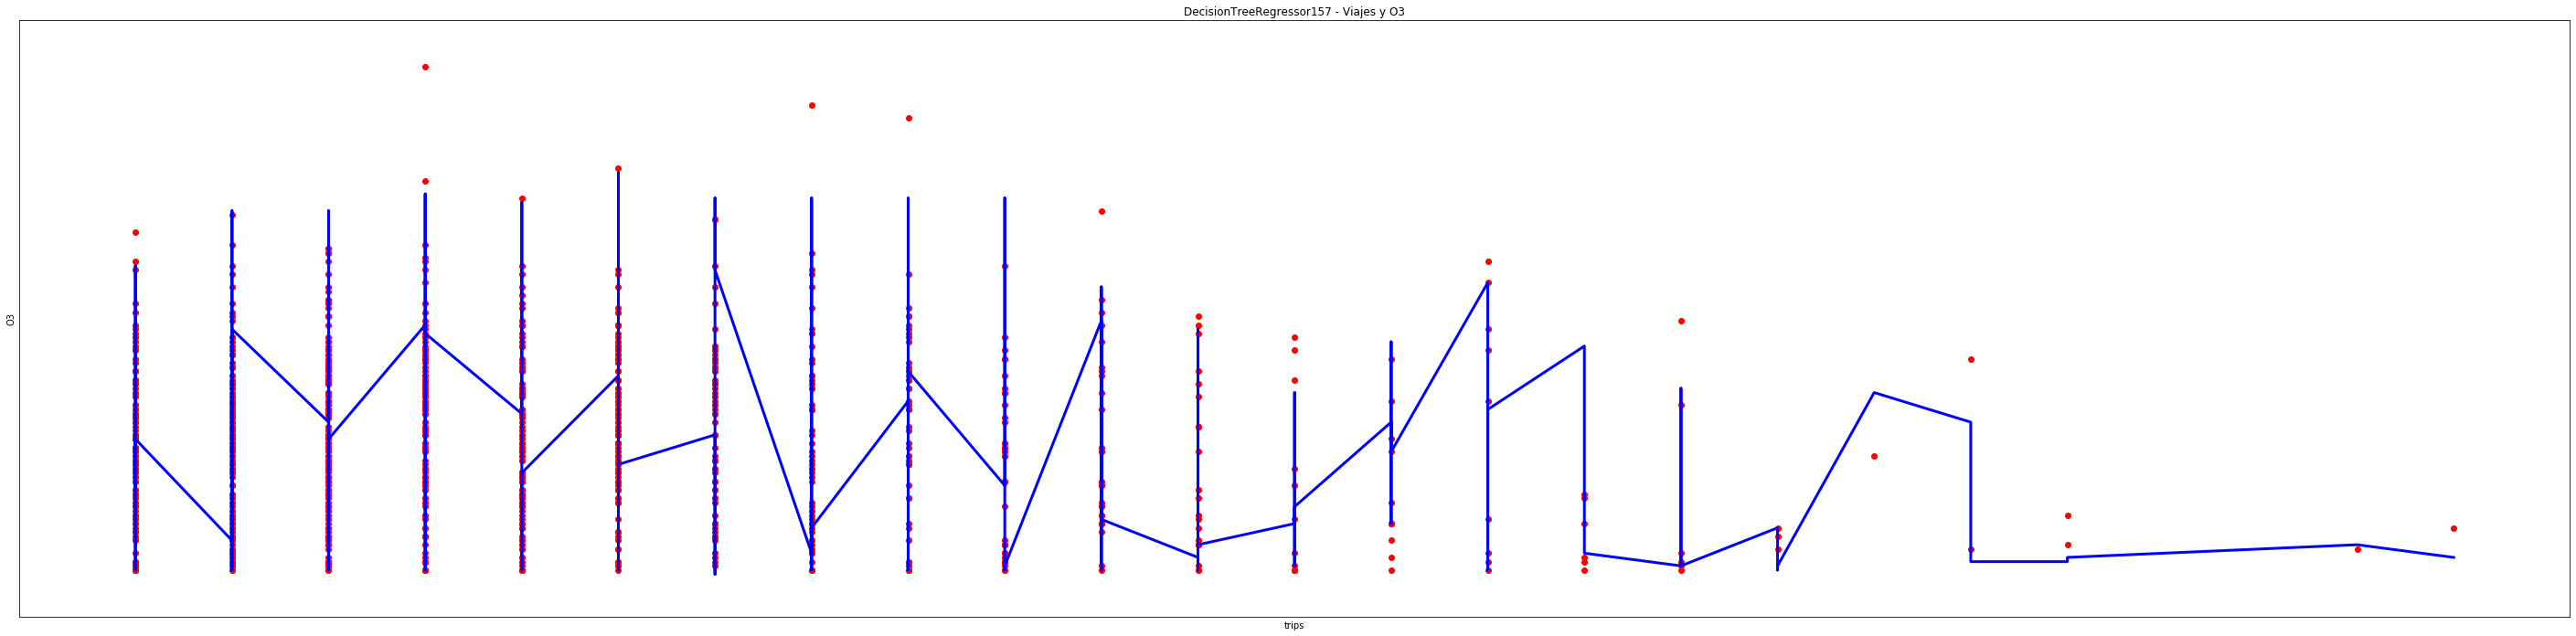

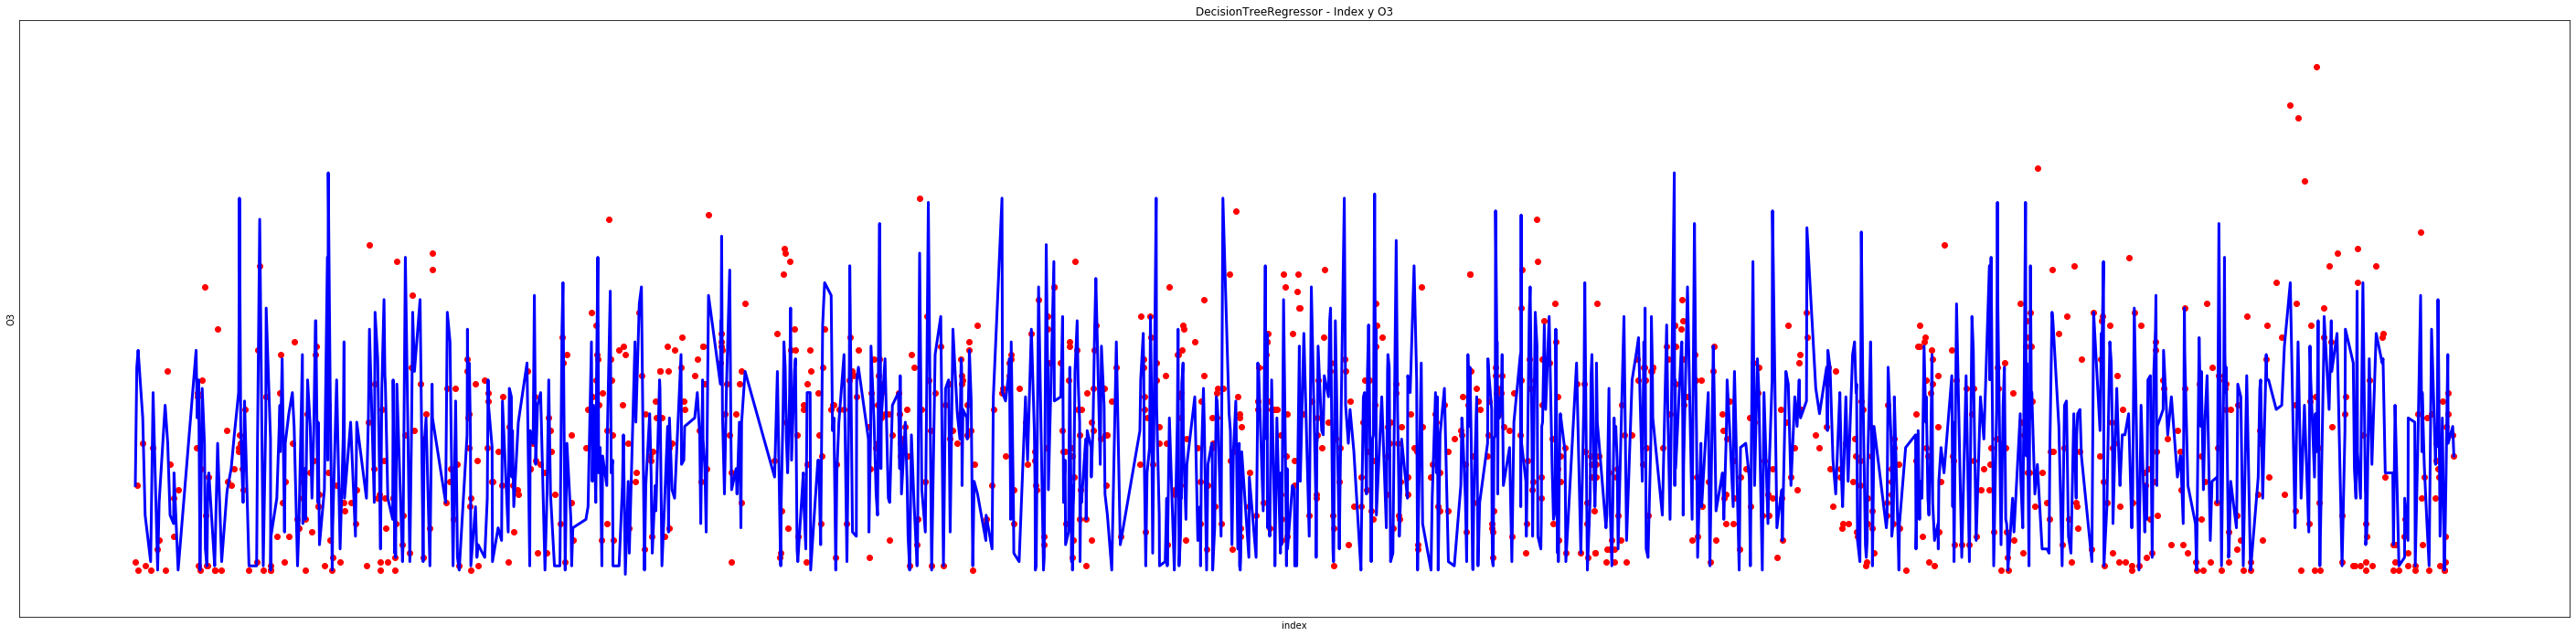

----------------------------------------------------MLPRegressor----------------------------------------------------
157 Mean squared error: 25748.34788
157 Coefficient of determination: -65894352.49931


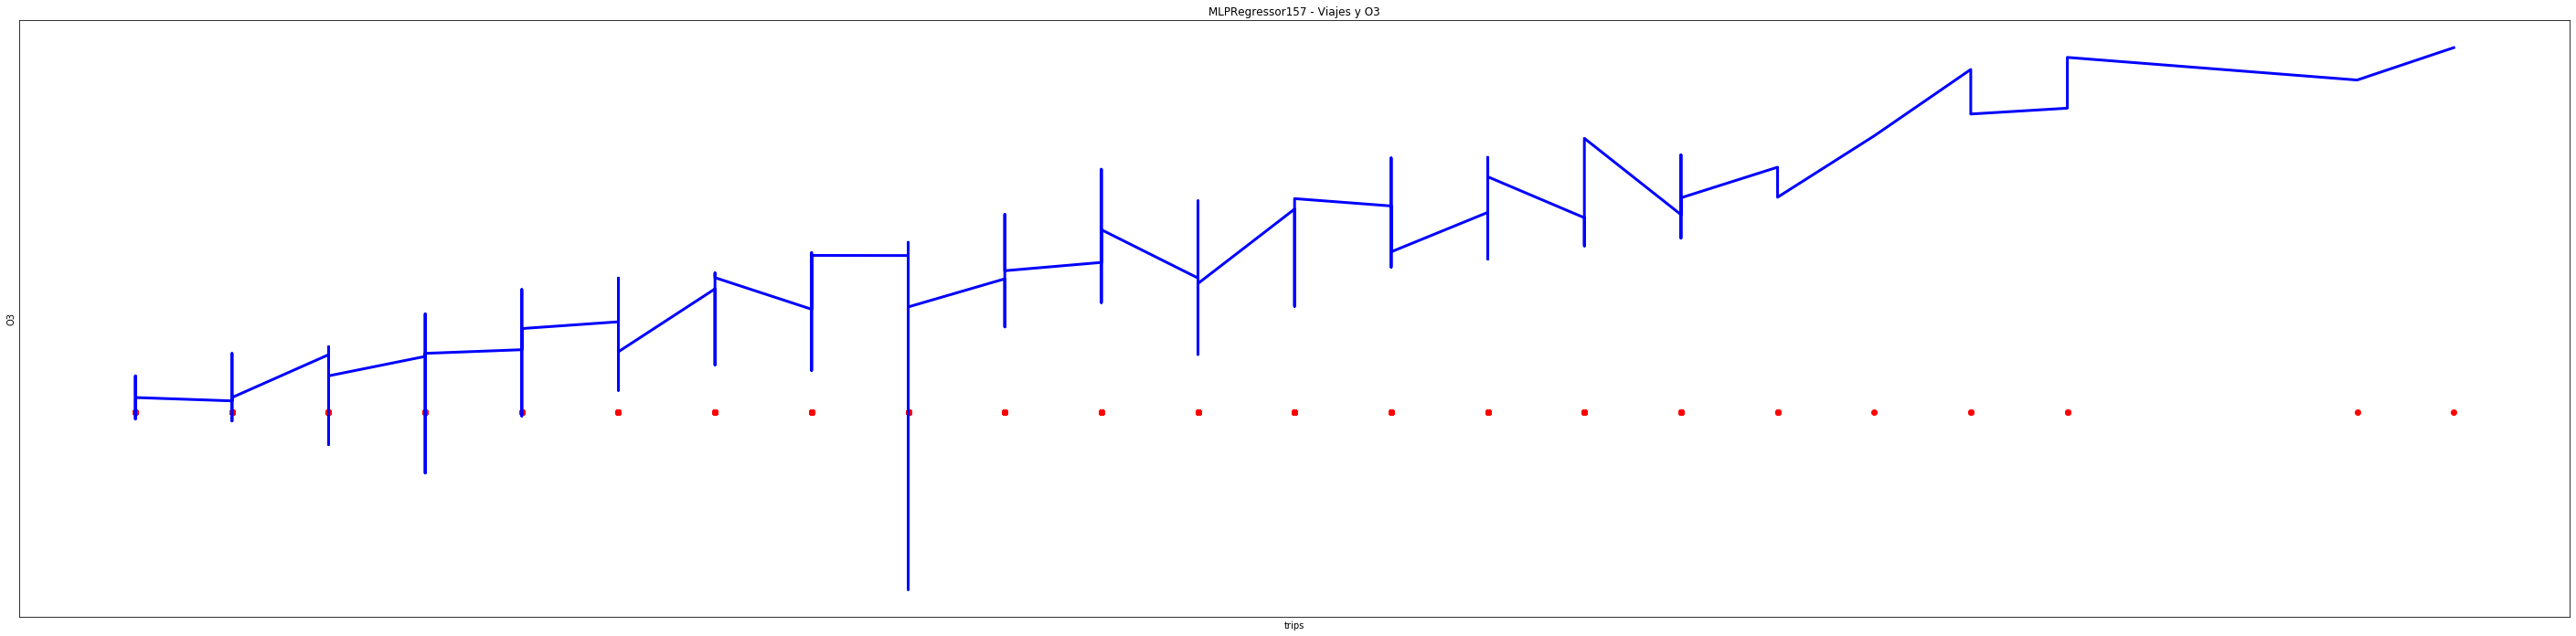

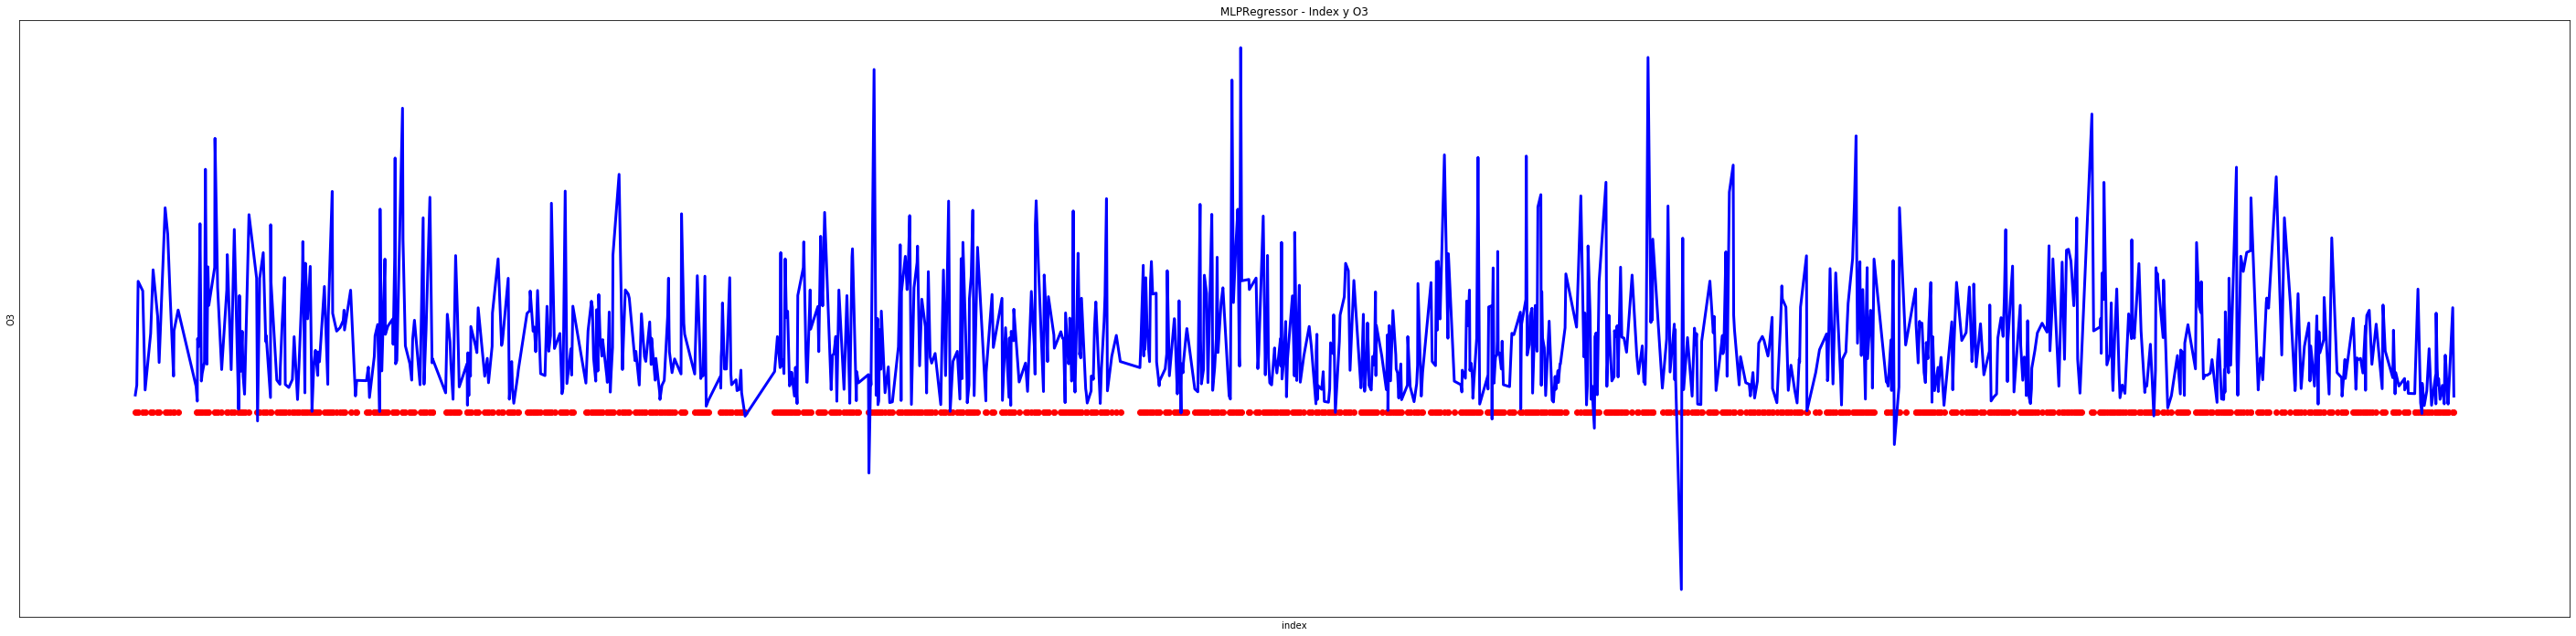

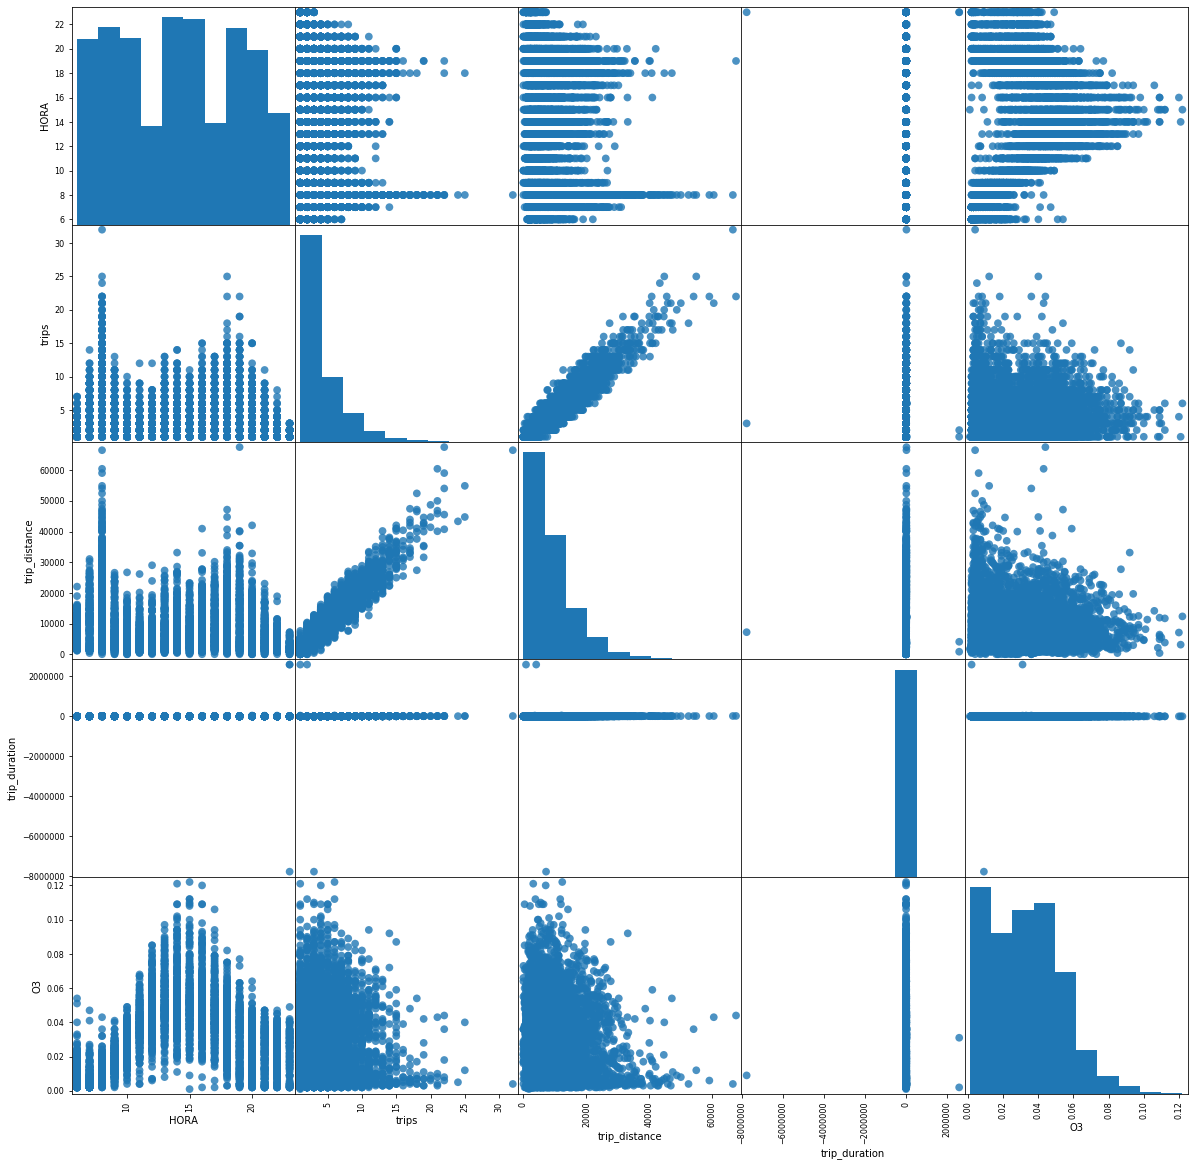

<ipython-input-30-2dd9955e0e97>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
165 Coefficients: 
 [ 0.05897445 -0.09565875 -0.00542342  0.02099509]
165 Mean squared error: 0.00039
165 Coefficient of determination: 0.07356


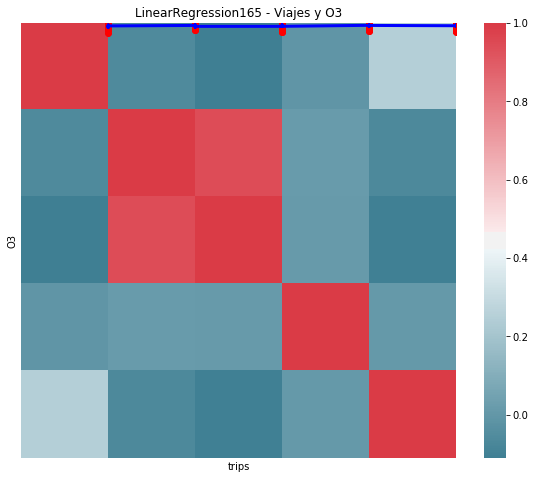

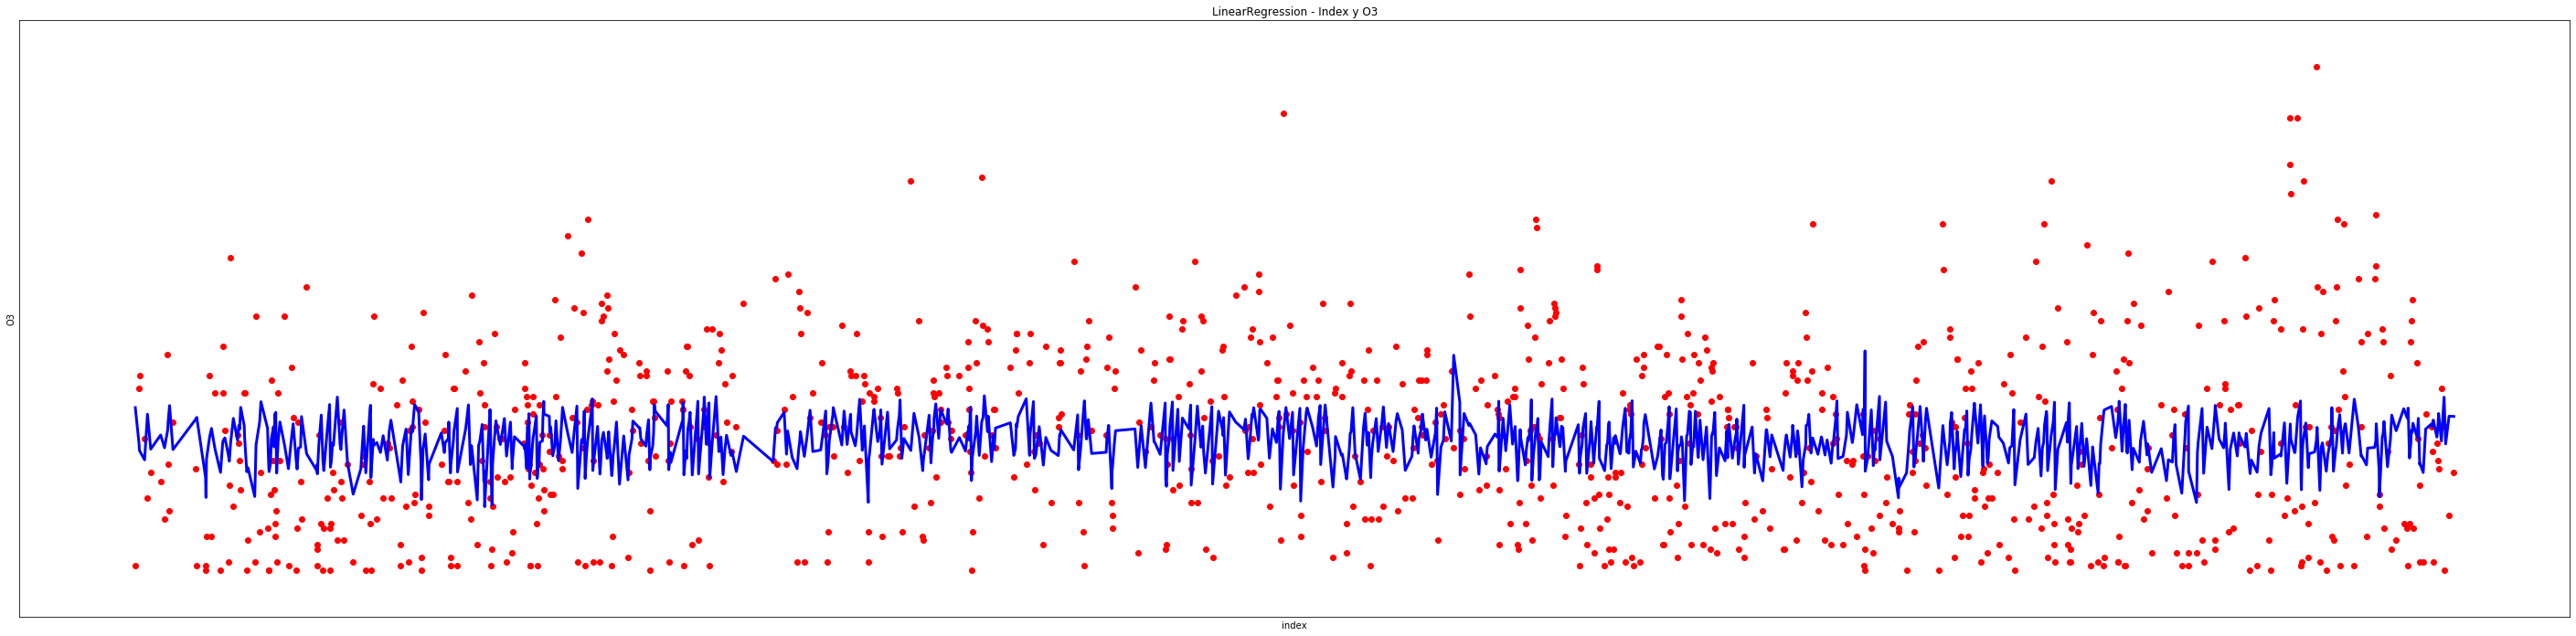

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
165 Mean squared error: 0.00031
165 Coefficient of determination: 0.27589


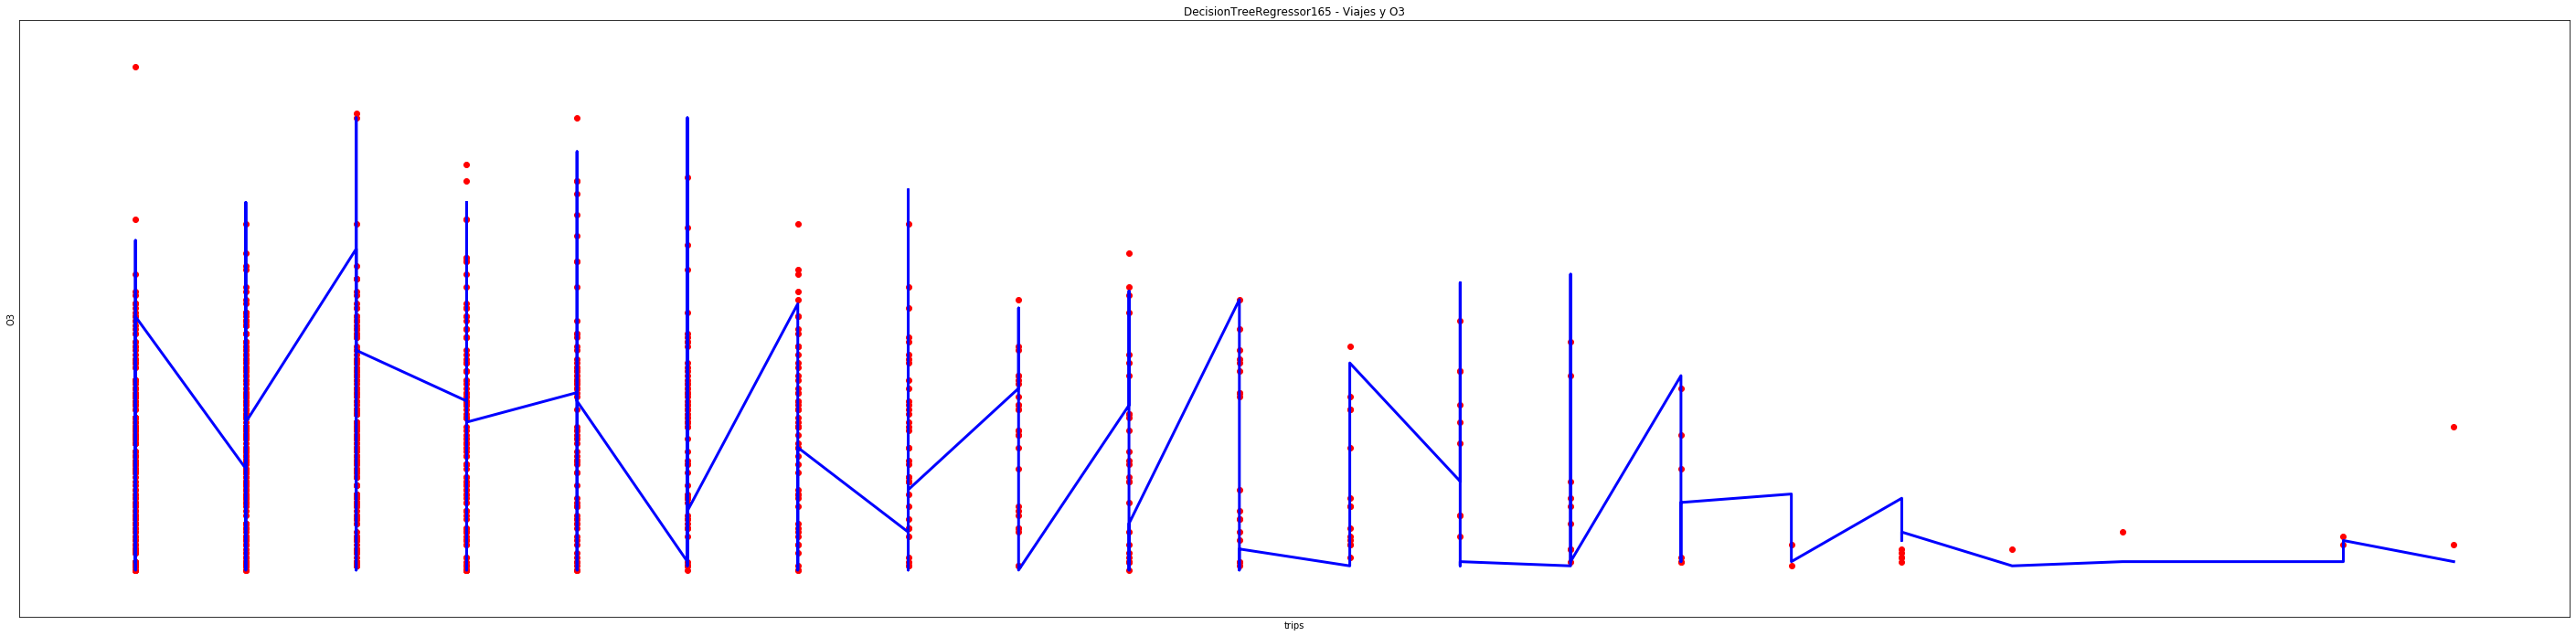

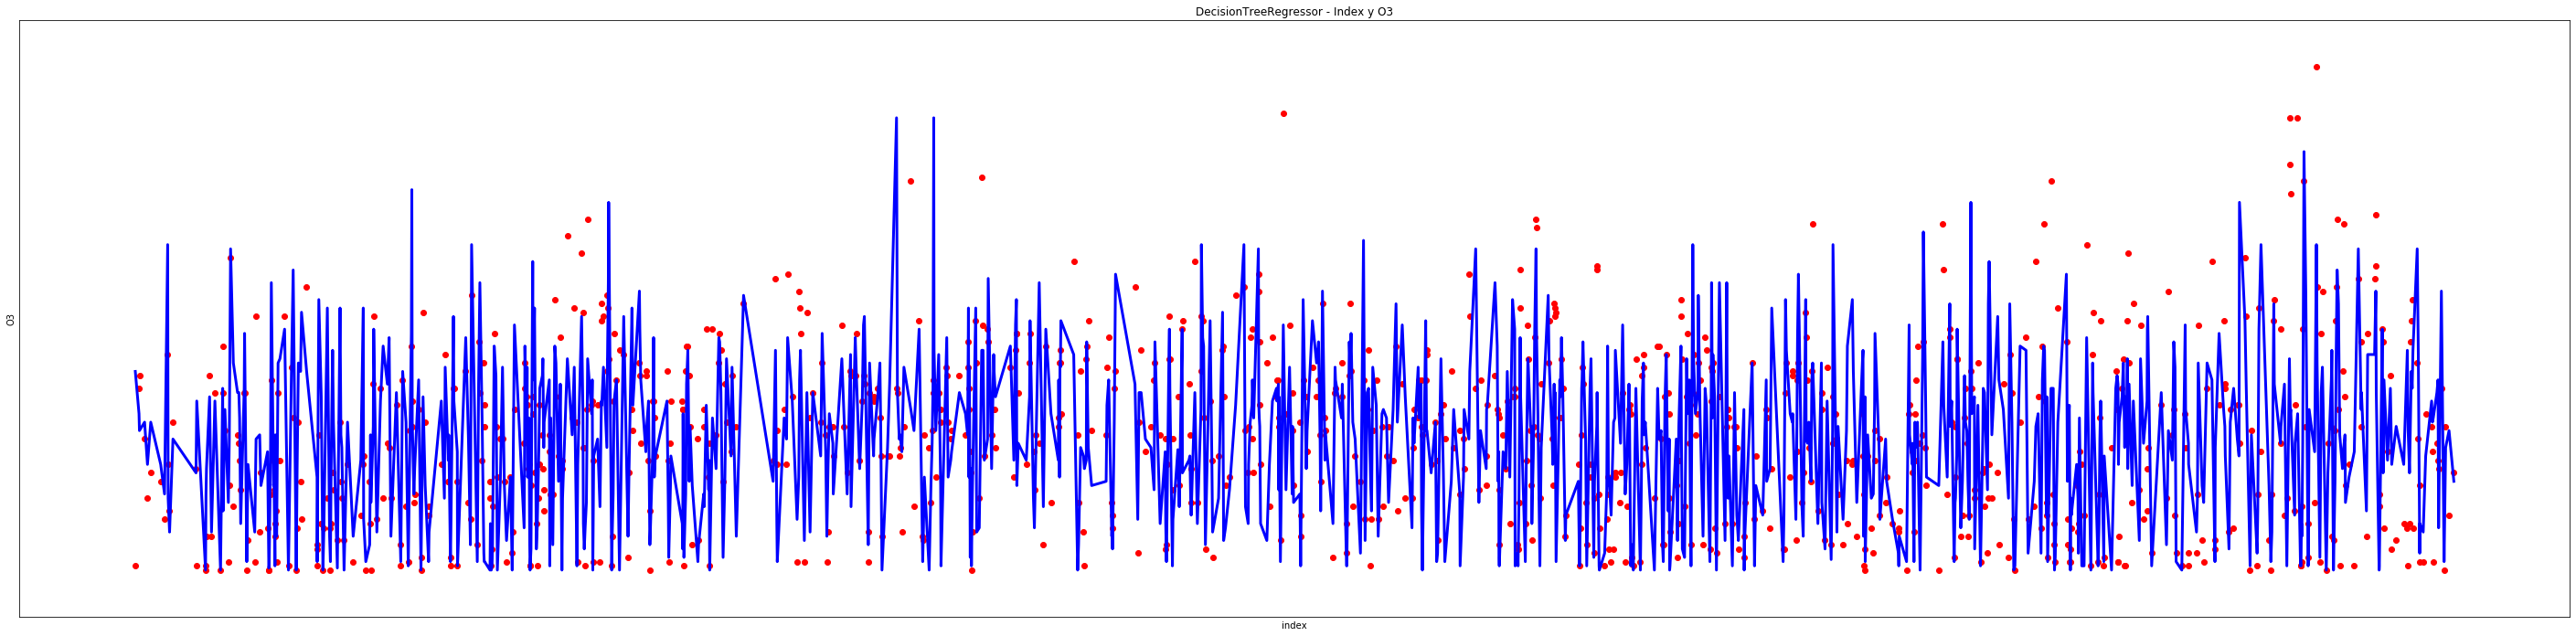

----------------------------------------------------MLPRegressor----------------------------------------------------
165 Mean squared error: 254408.22574
165 Coefficient of determination: -598056529.32202


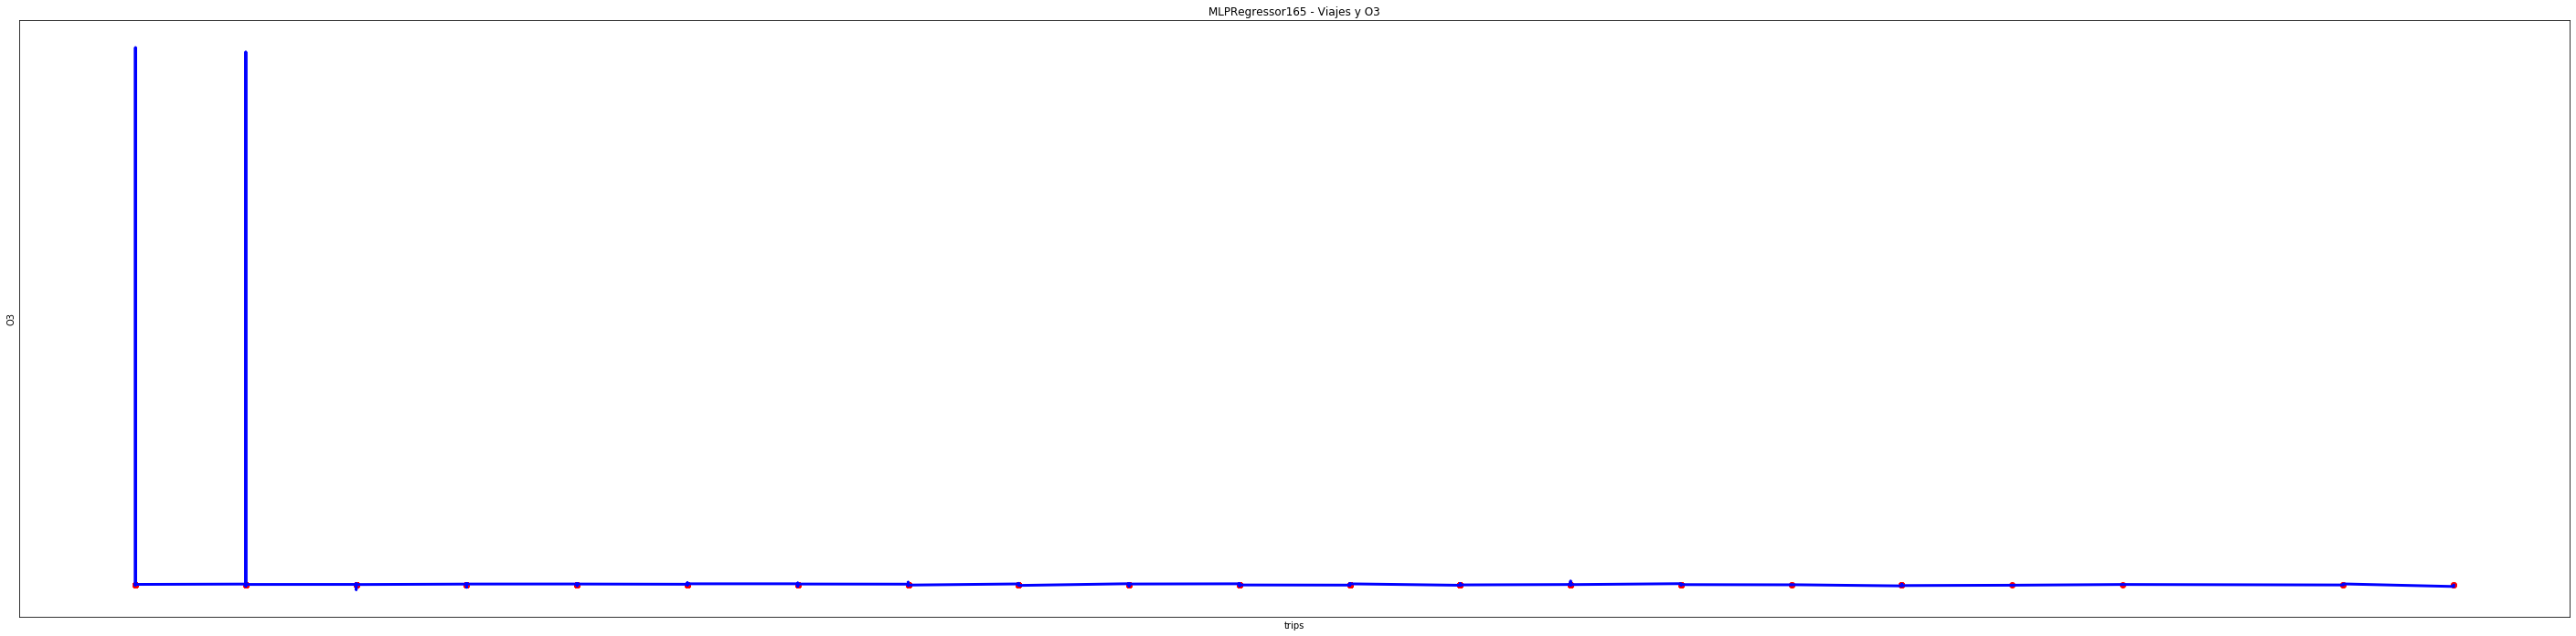

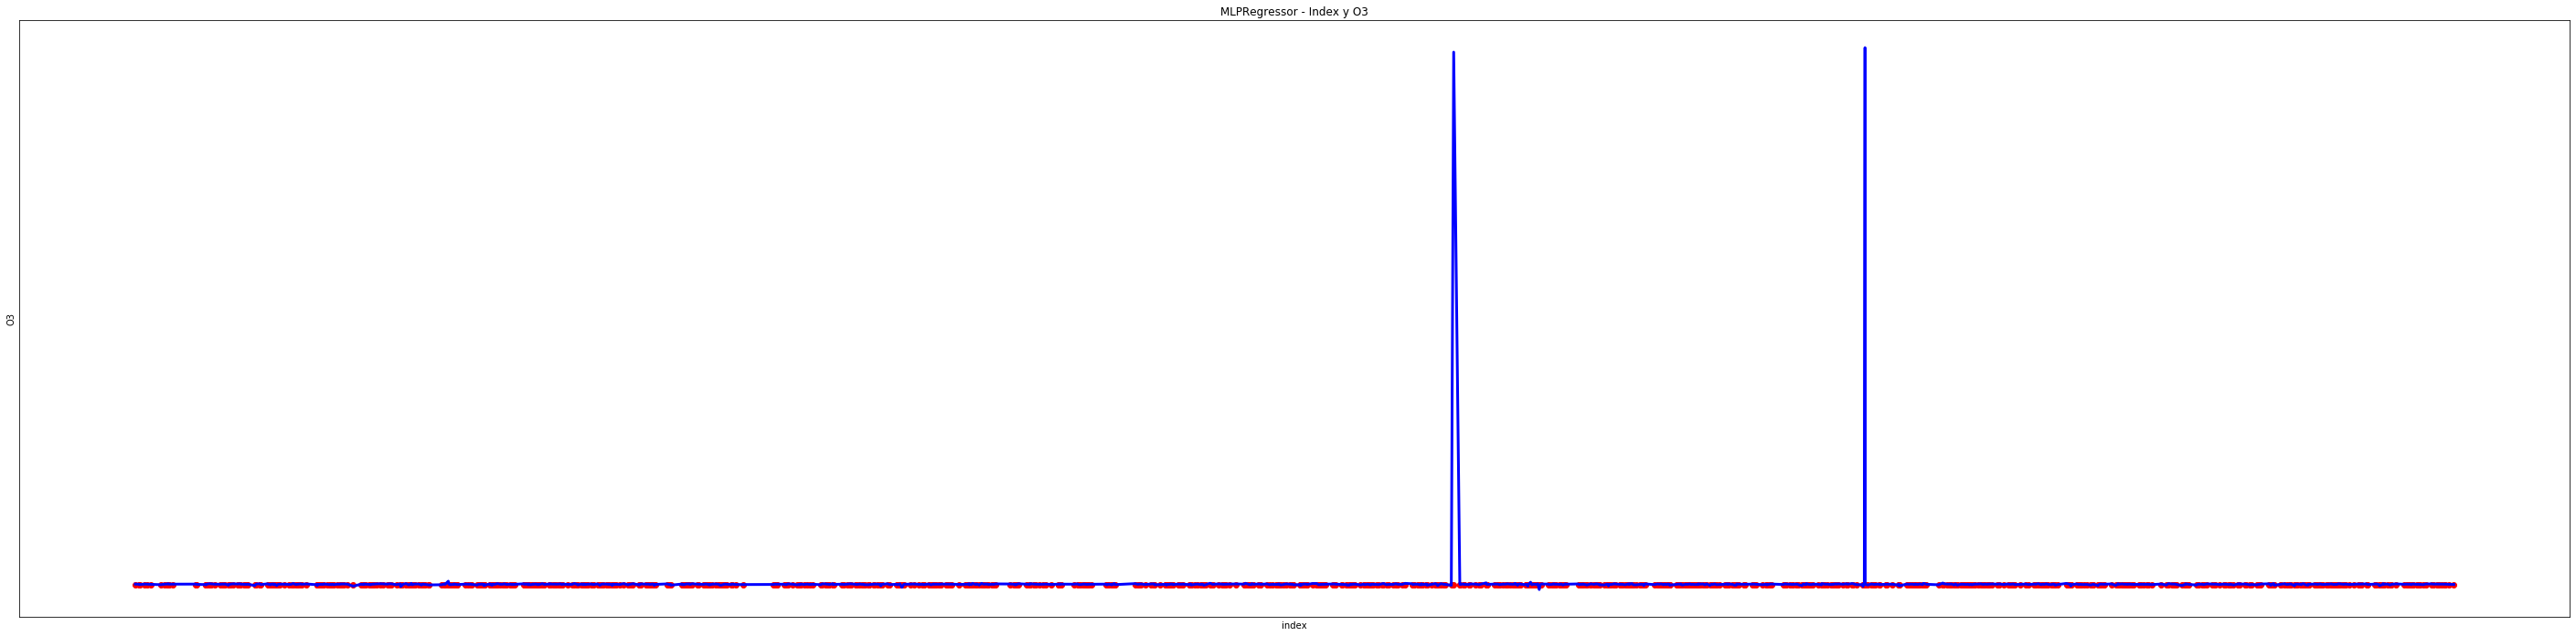

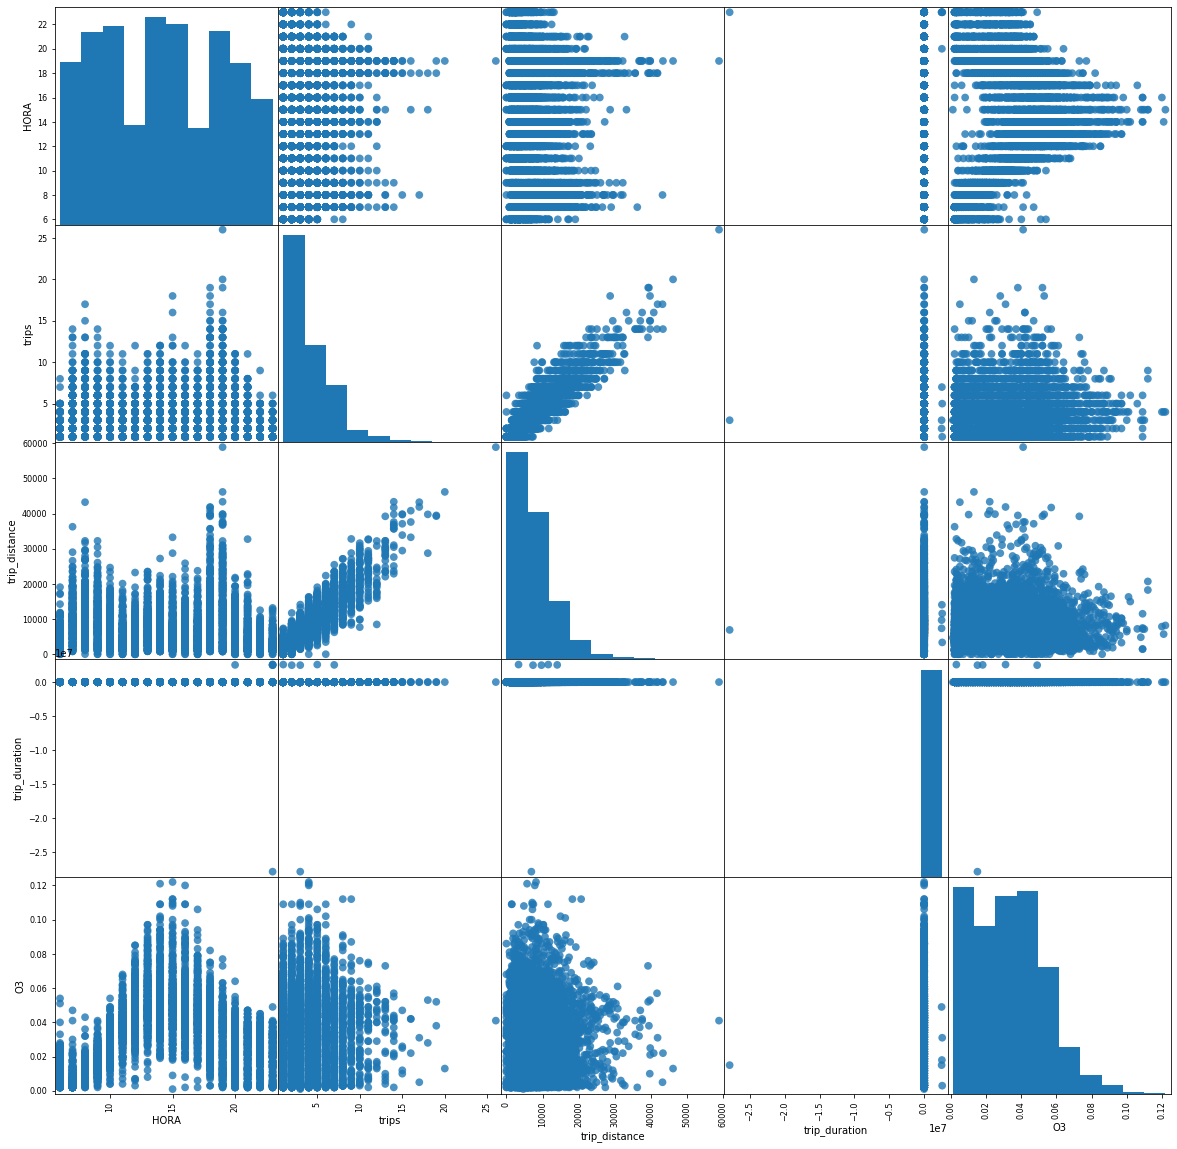

<ipython-input-30-2dd9955e0e97>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
161 Coefficients: 
 [ 0.05897445 -0.09565875 -0.00542342  0.02099509]
161 Mean squared error: 0.00038
161 Coefficient of determination: 0.07227


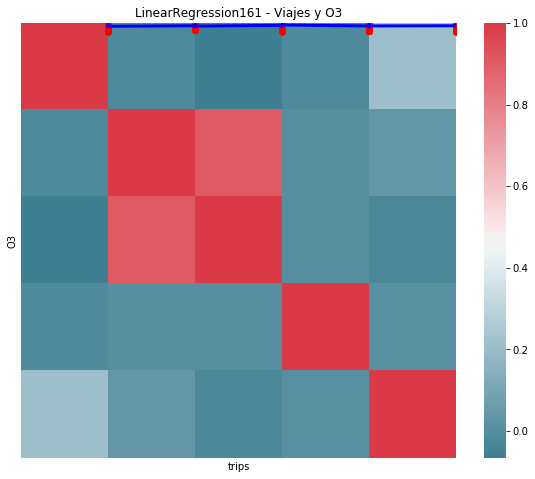

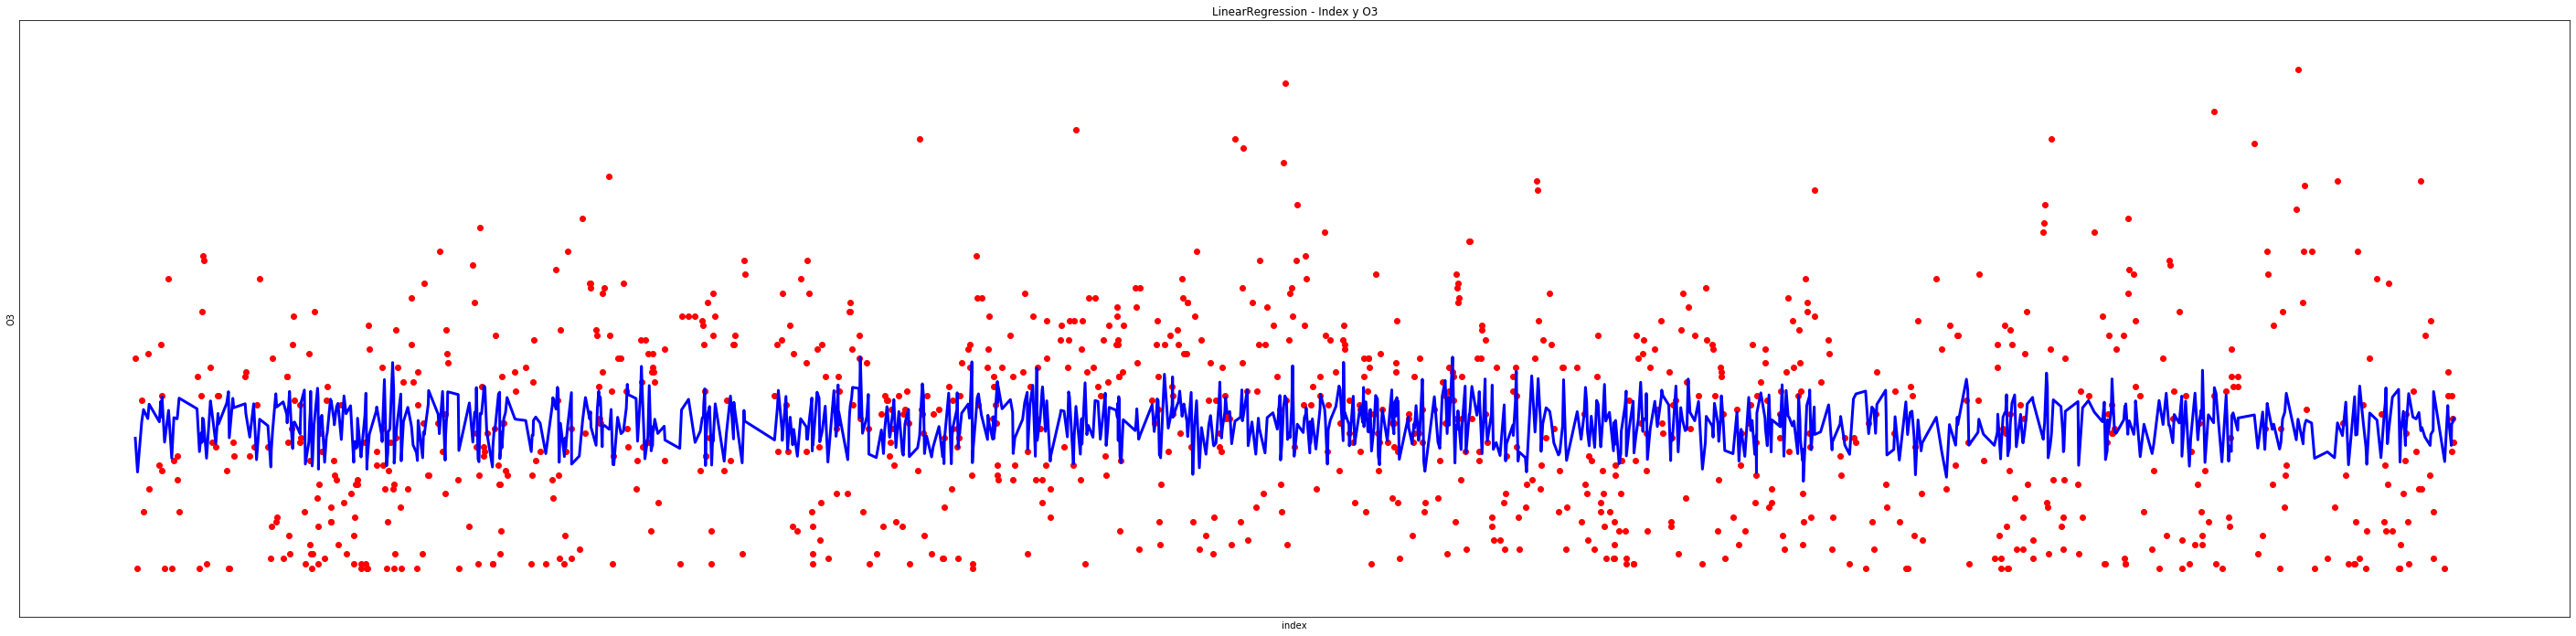

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
161 Mean squared error: 0.00037
161 Coefficient of determination: 0.08801


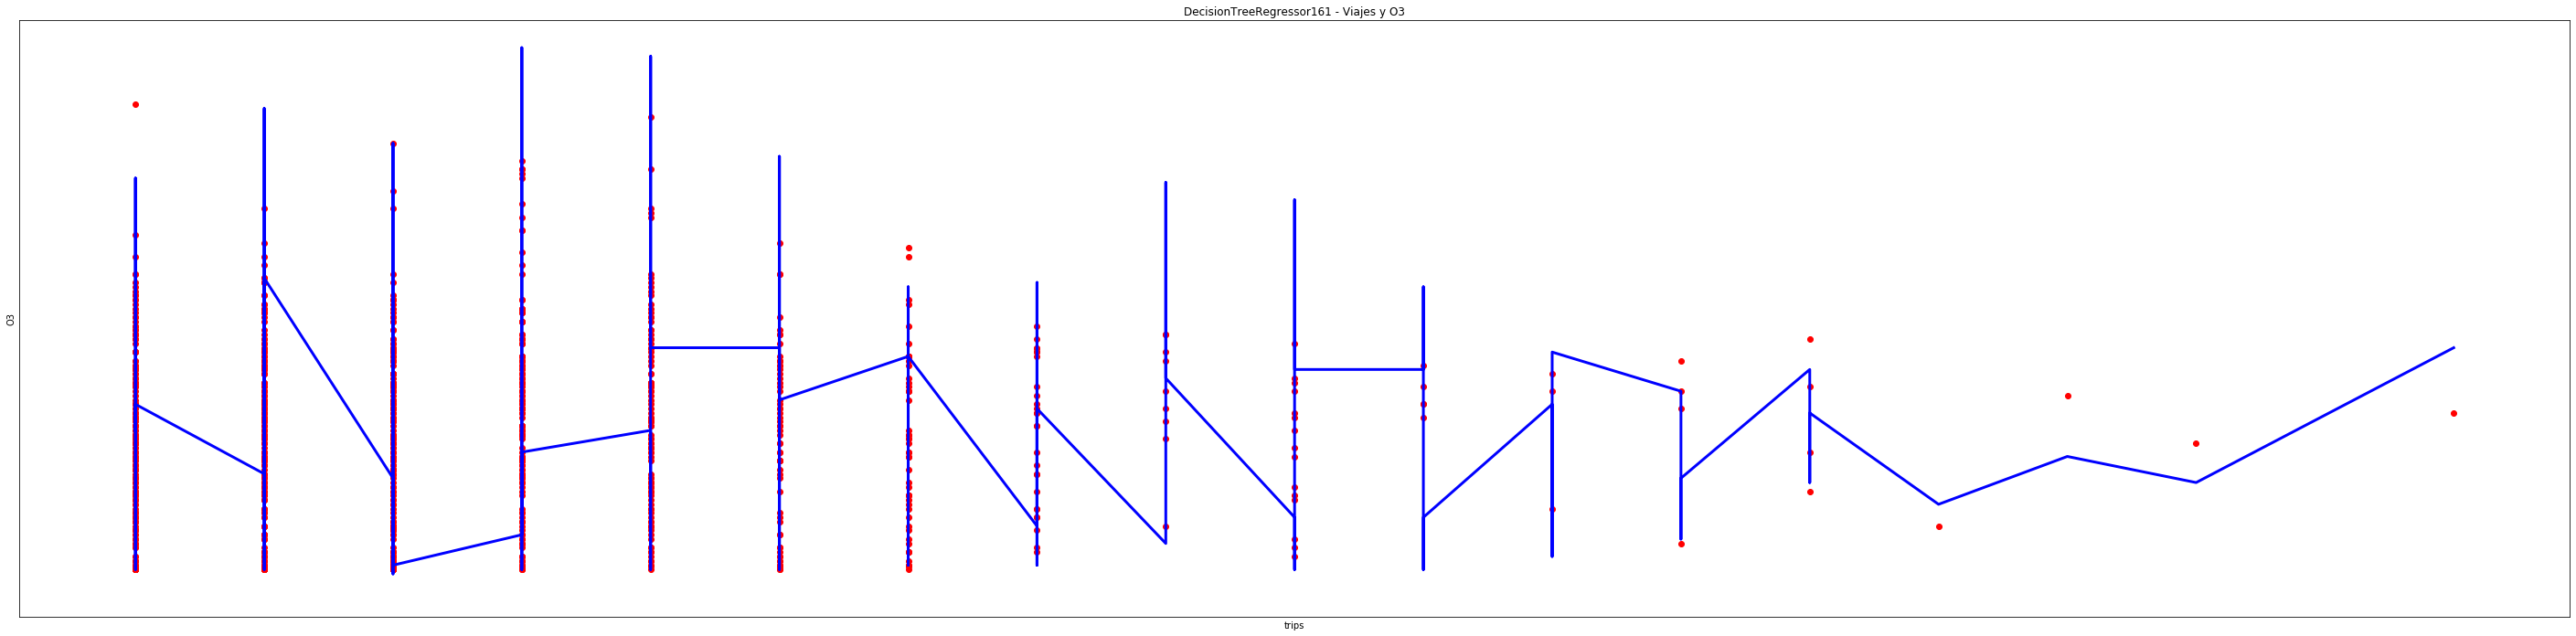

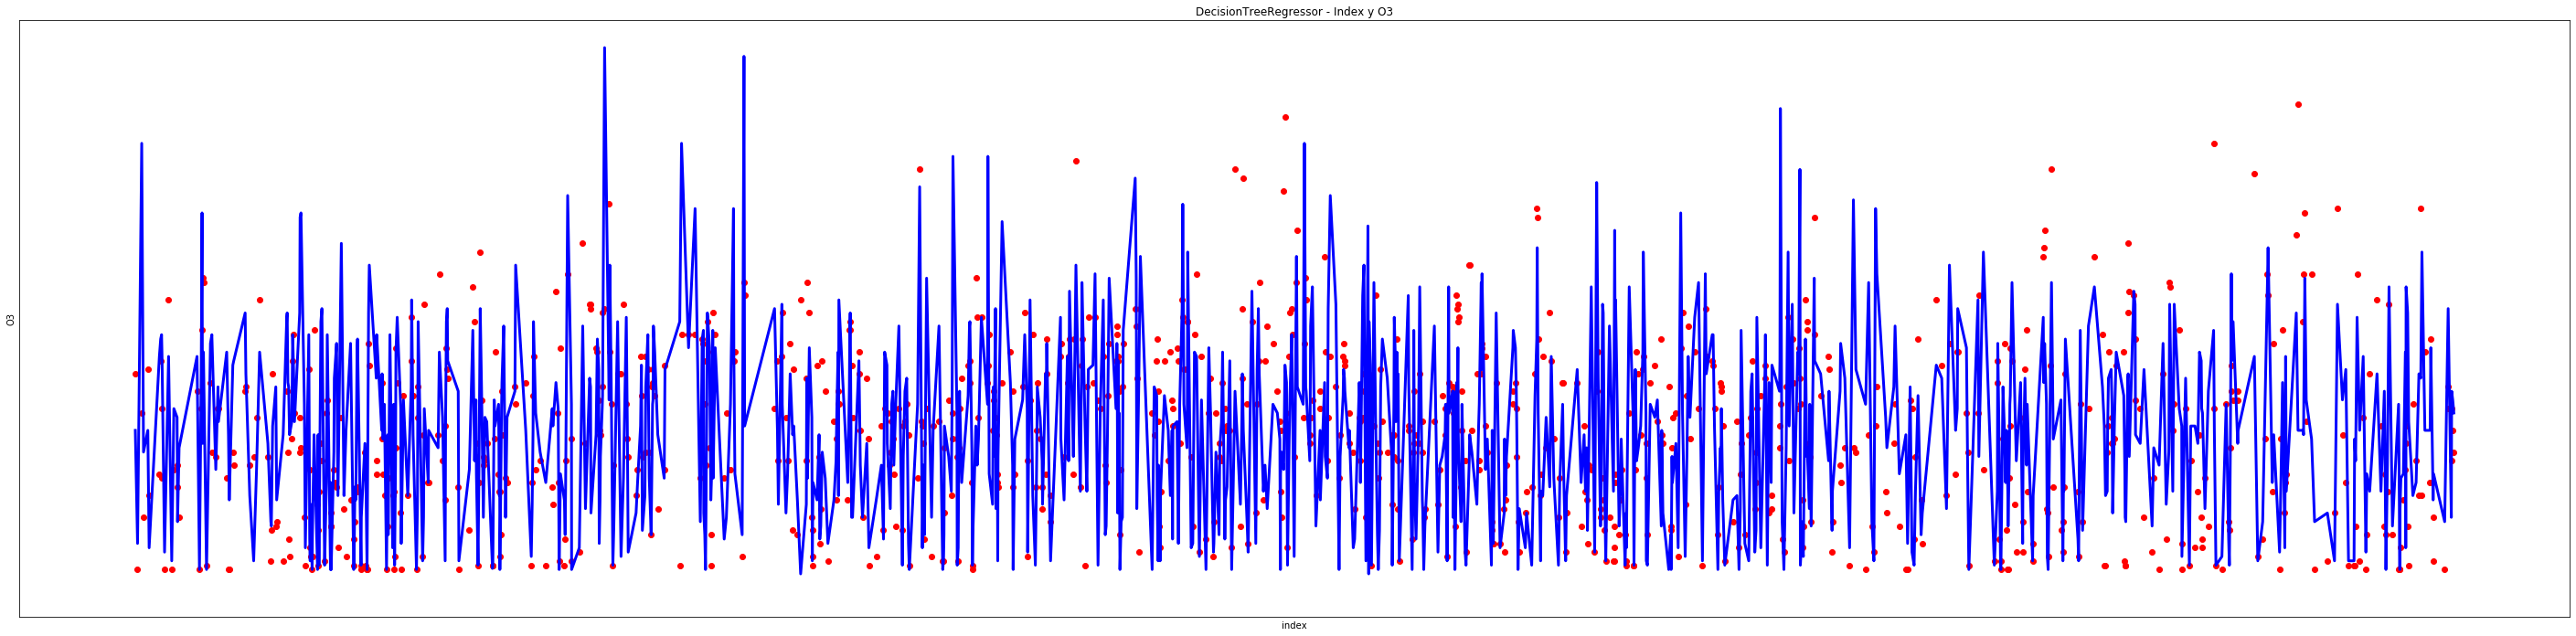

----------------------------------------------------MLPRegressor----------------------------------------------------
161 Mean squared error: 5427.22914
161 Coefficient of determination: -13304011.29017


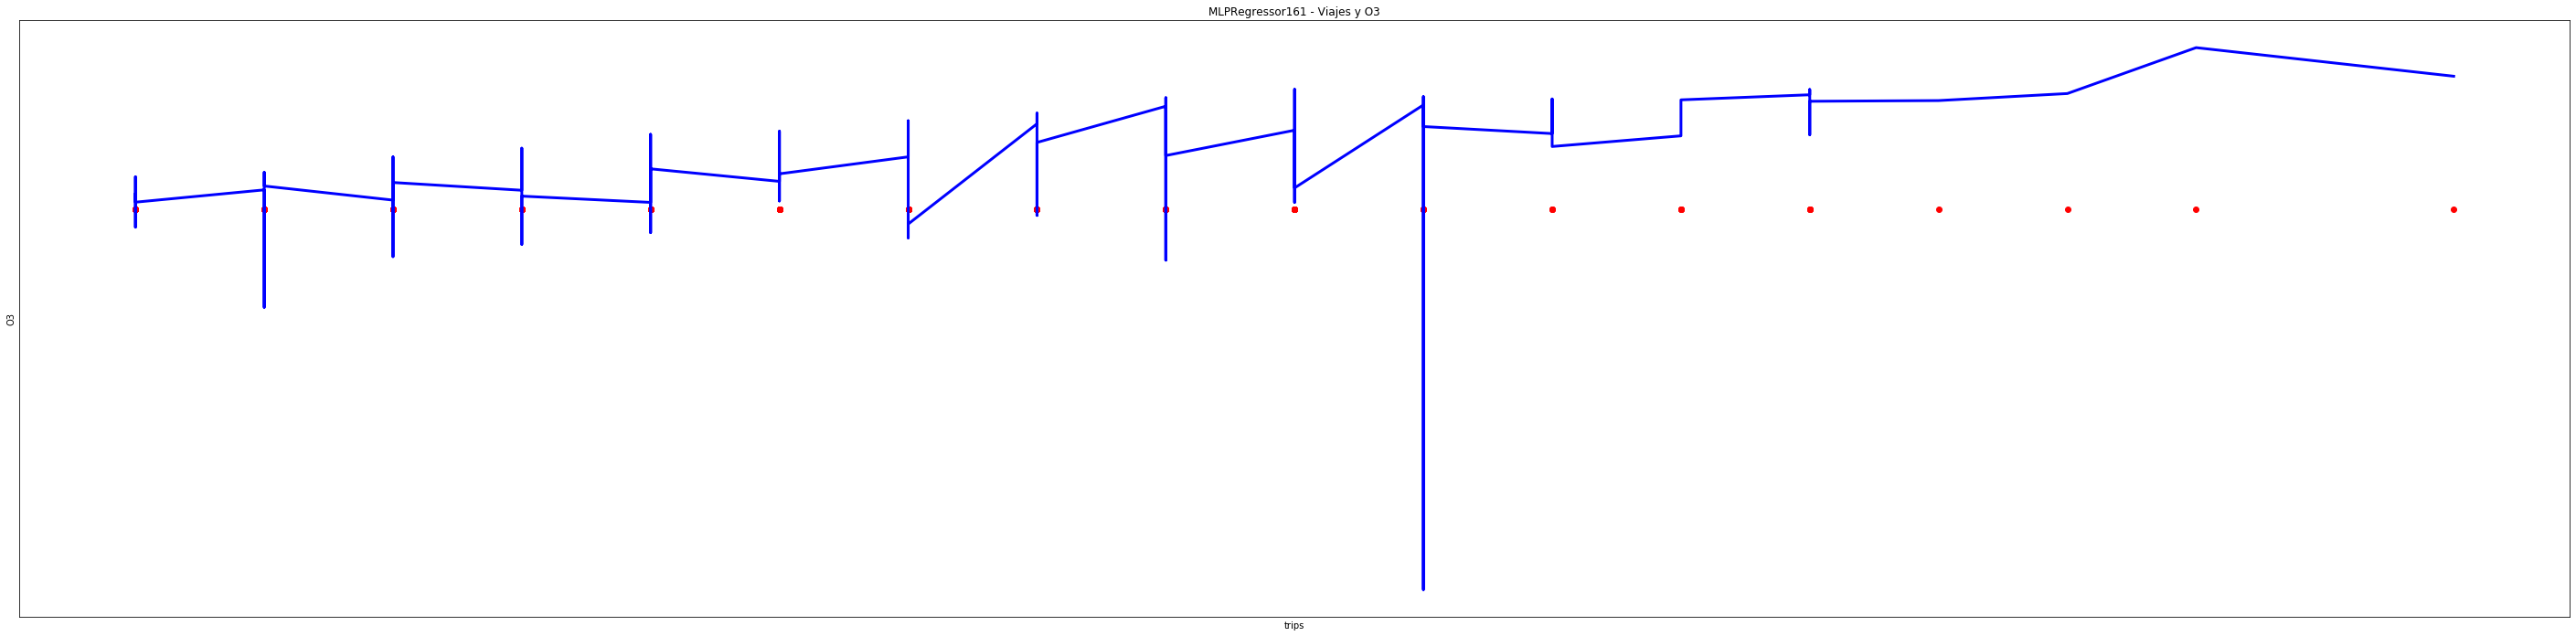

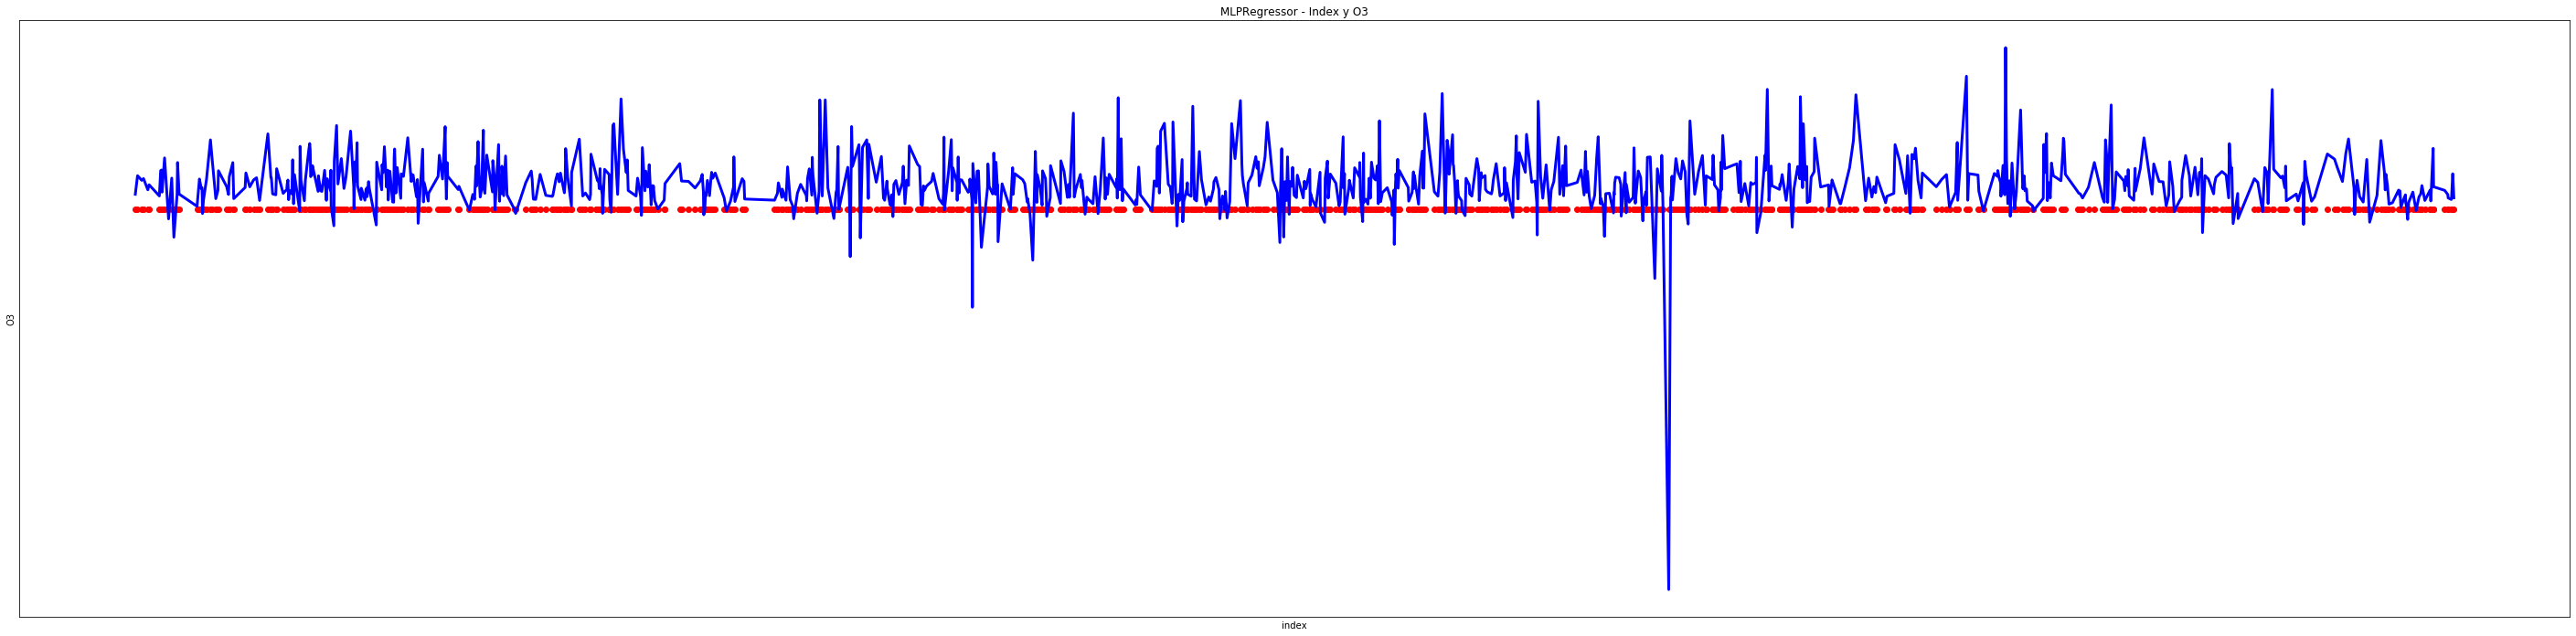

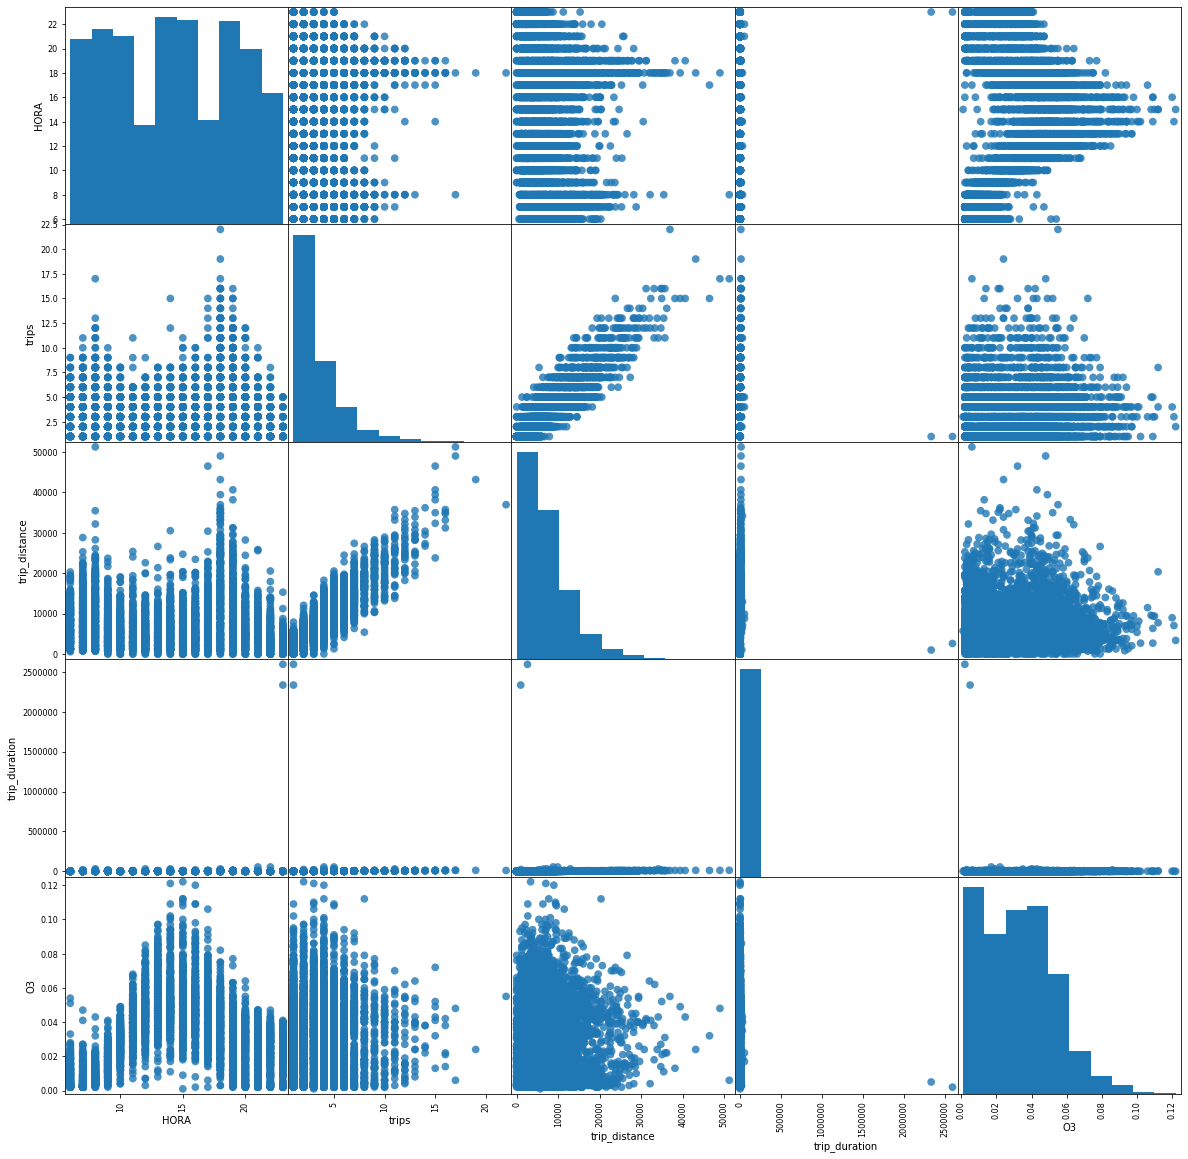

<ipython-input-30-2dd9955e0e97>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
249 Coefficients: 
 [ 0.05897445 -0.09565875 -0.00542342  0.02099509]
249 Mean squared error: 0.00040
249 Coefficient of determination: 0.04992


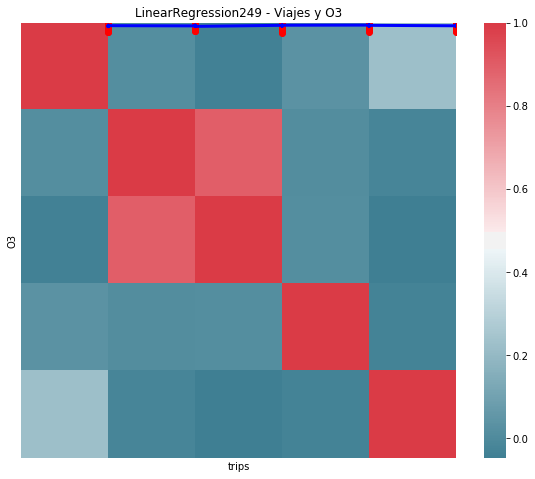

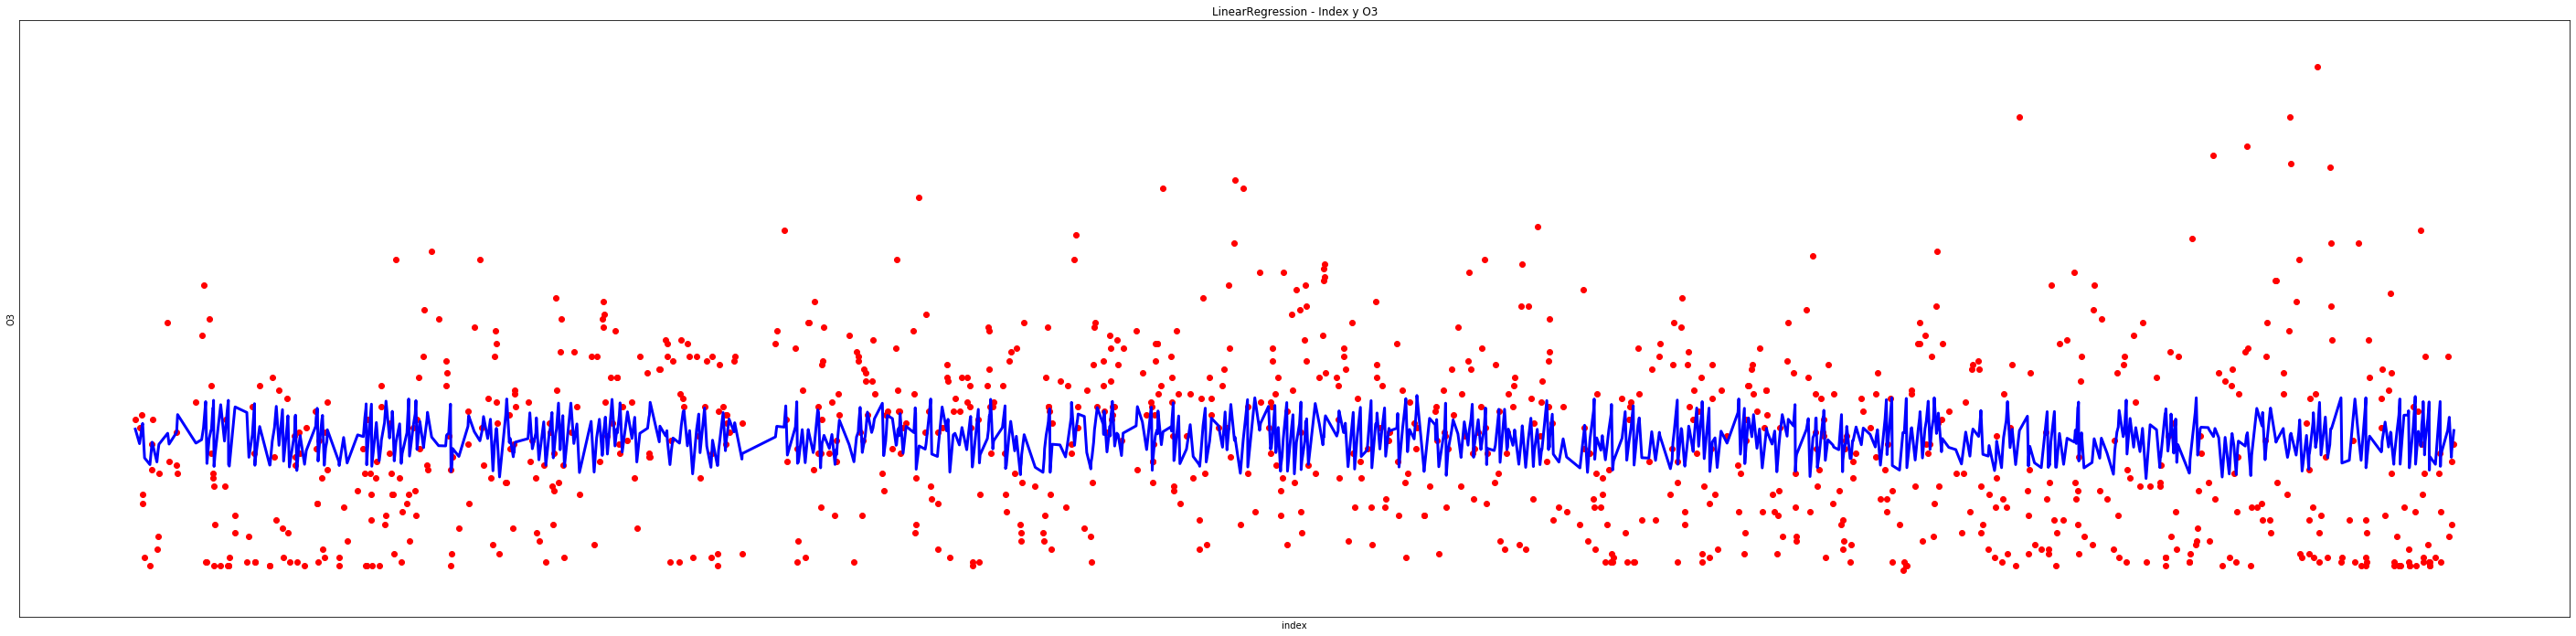

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
249 Mean squared error: 0.00033
249 Coefficient of determination: 0.21449


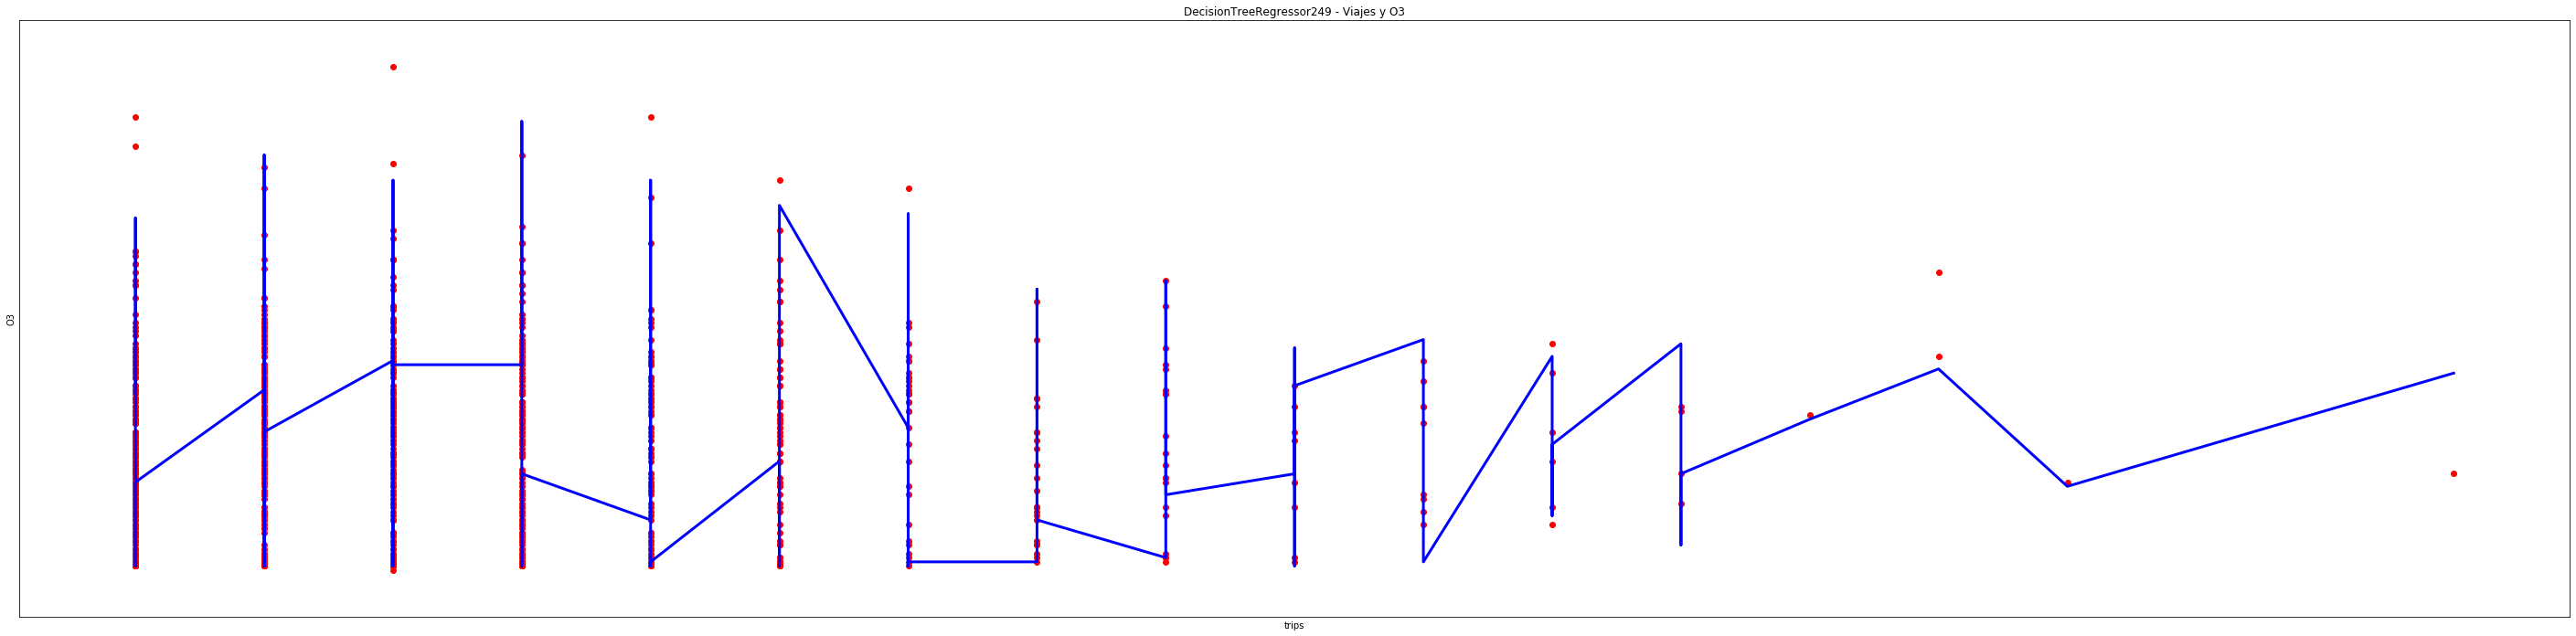

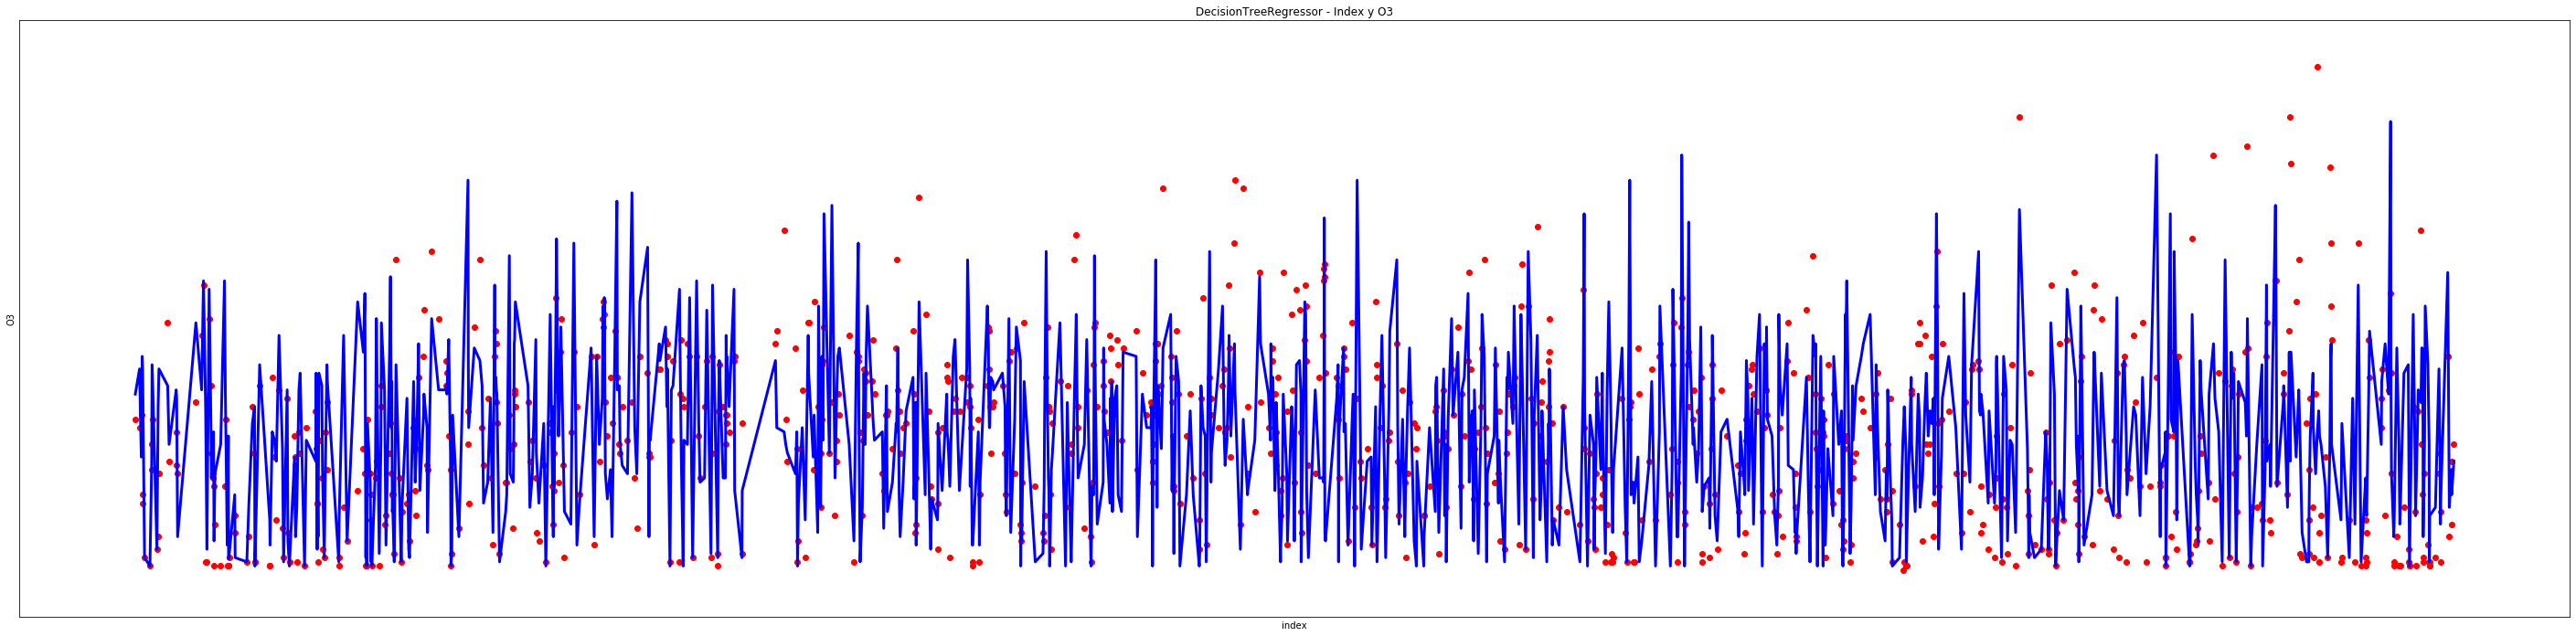

----------------------------------------------------MLPRegressor----------------------------------------------------
249 Mean squared error: 1413.93210
249 Coefficient of determination: -3364646.27081


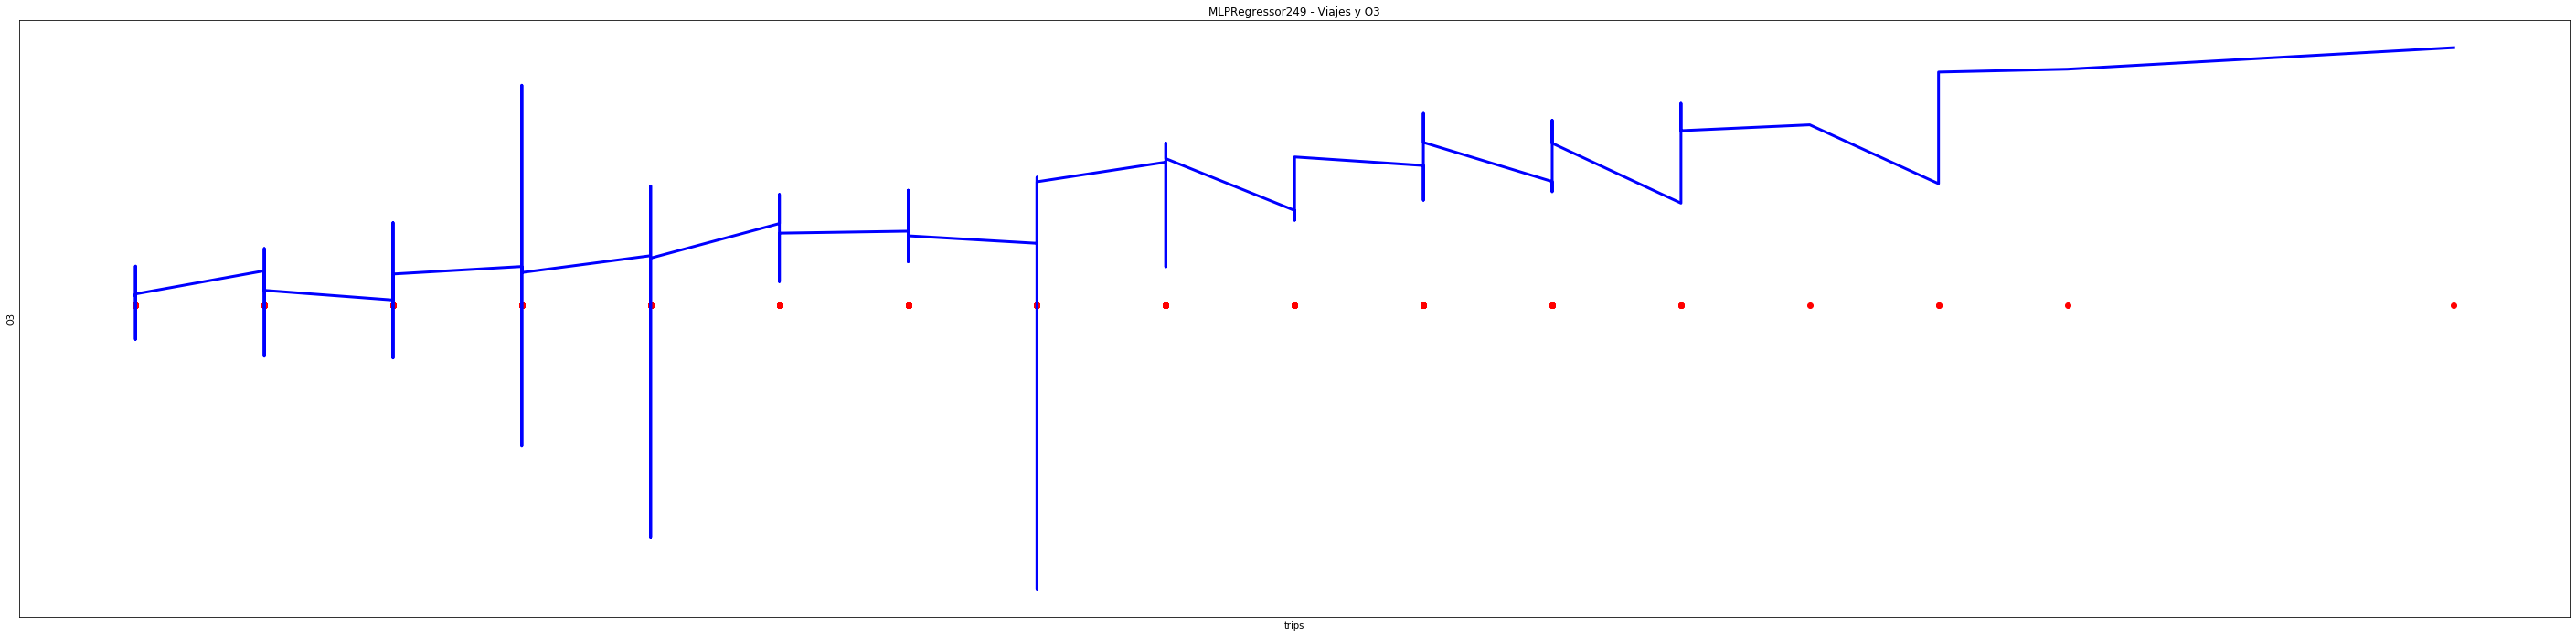

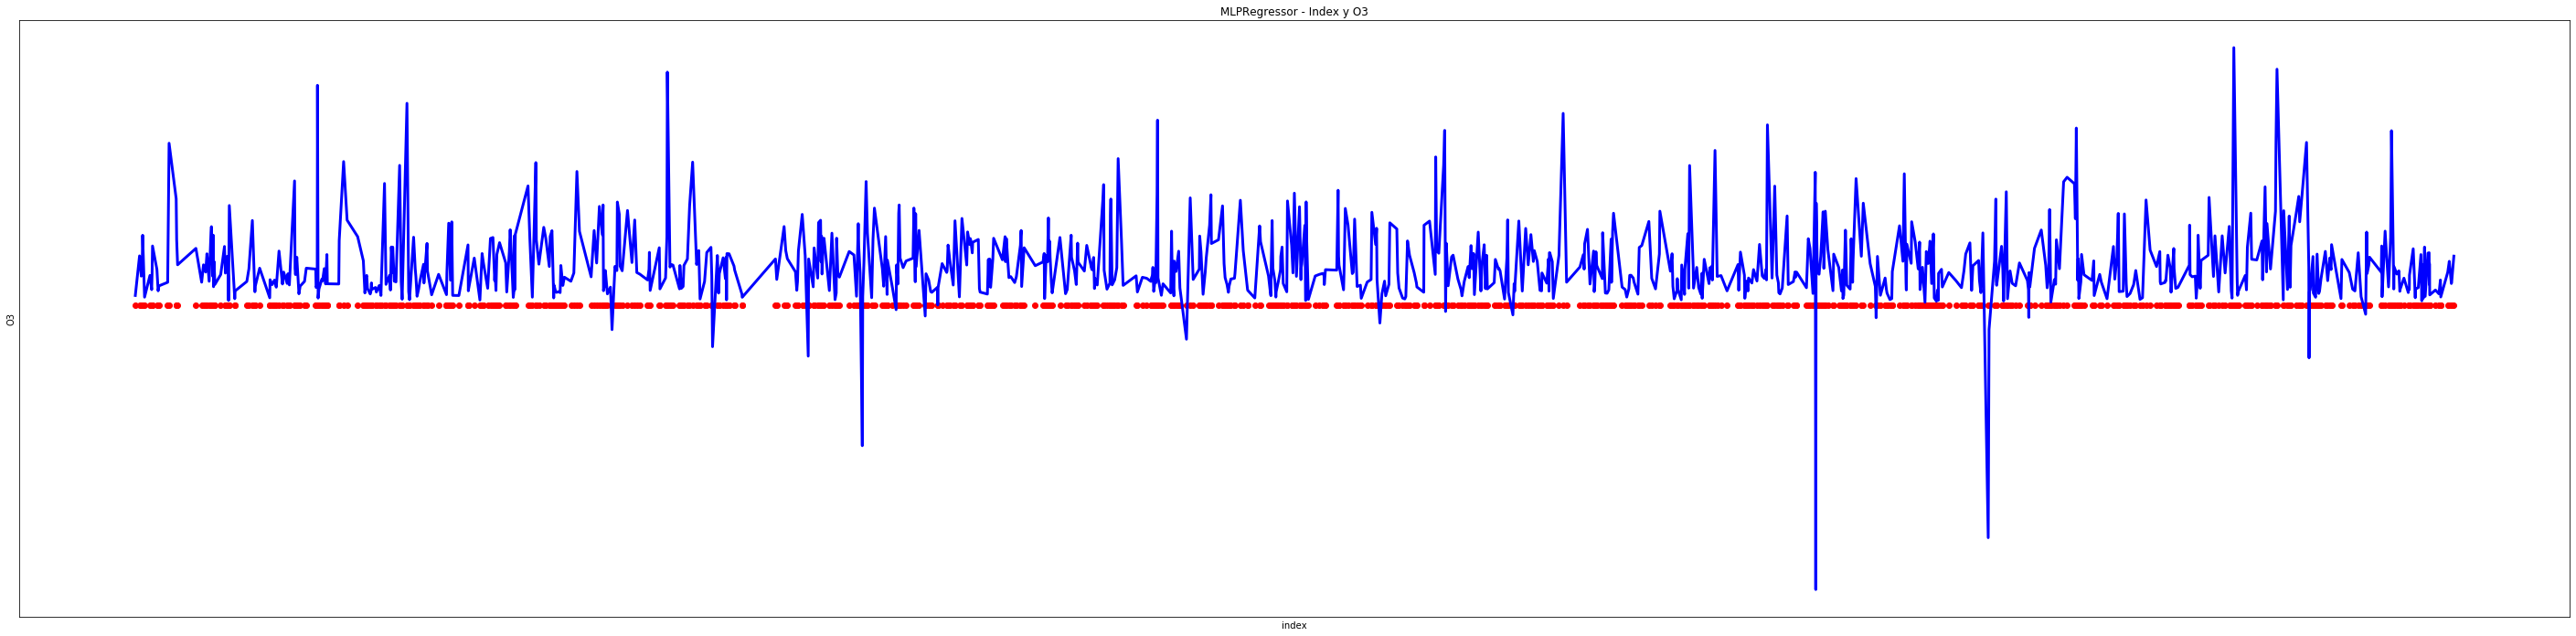

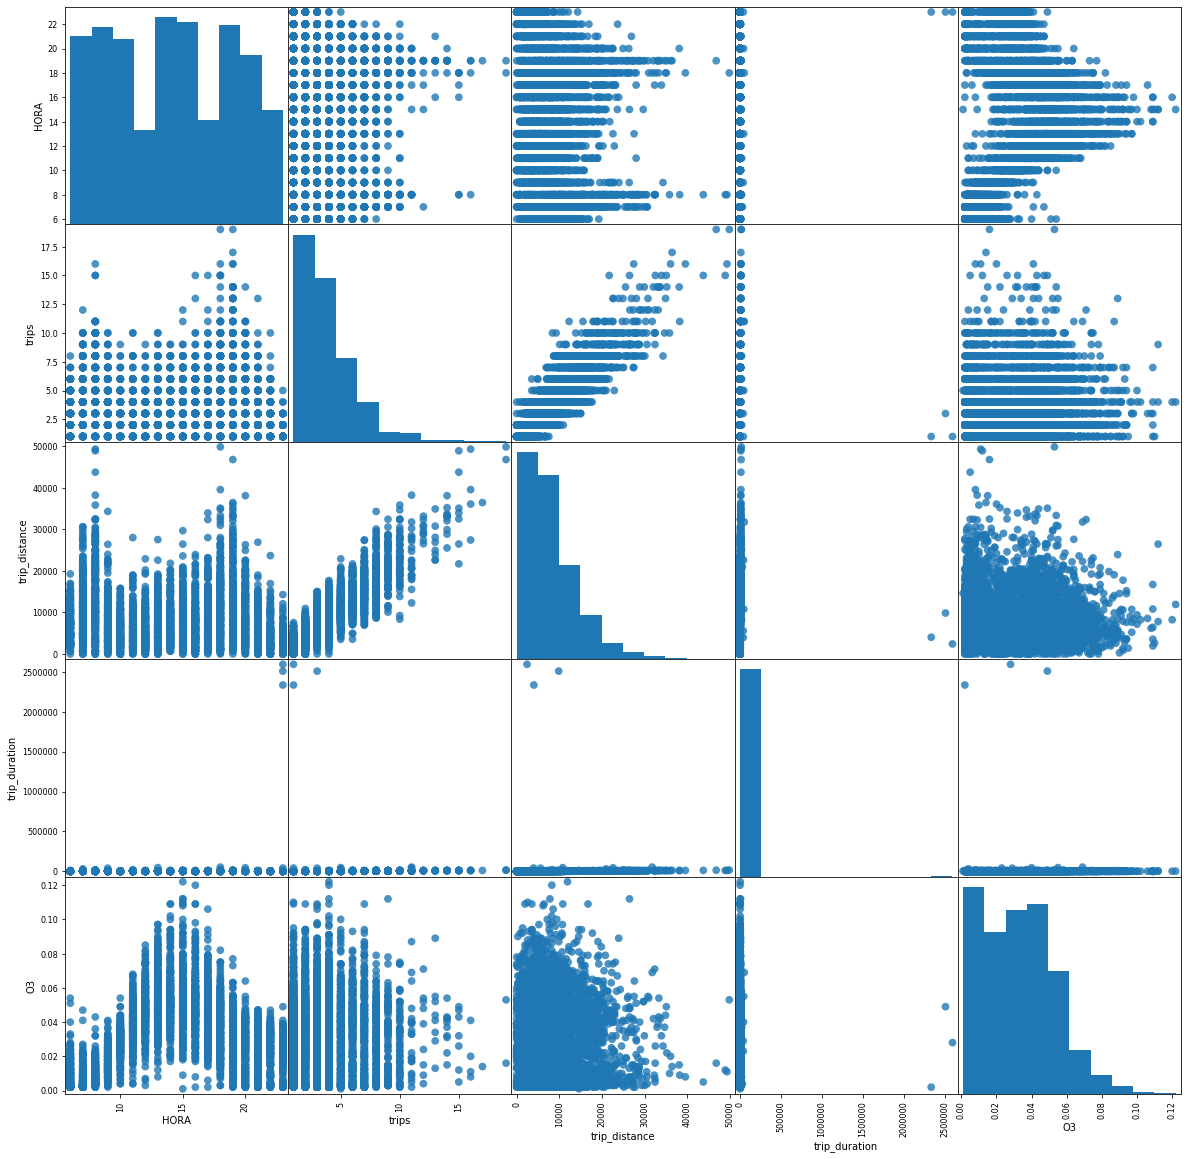

<ipython-input-30-2dd9955e0e97>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_top.sort_values(by='trips', ascending=True, inplace=True)


----------------------------------------------------LinearRegression----------------------------------------------------
266 Coefficients: 
 [ 0.05897445 -0.09565875 -0.00542342  0.02099509]
266 Mean squared error: 0.00039
266 Coefficient of determination: 0.07952


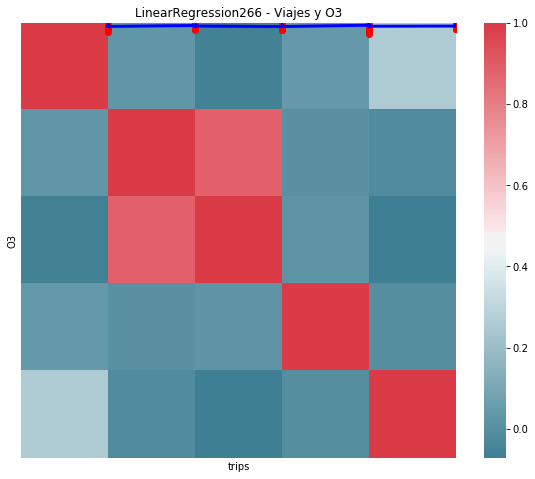

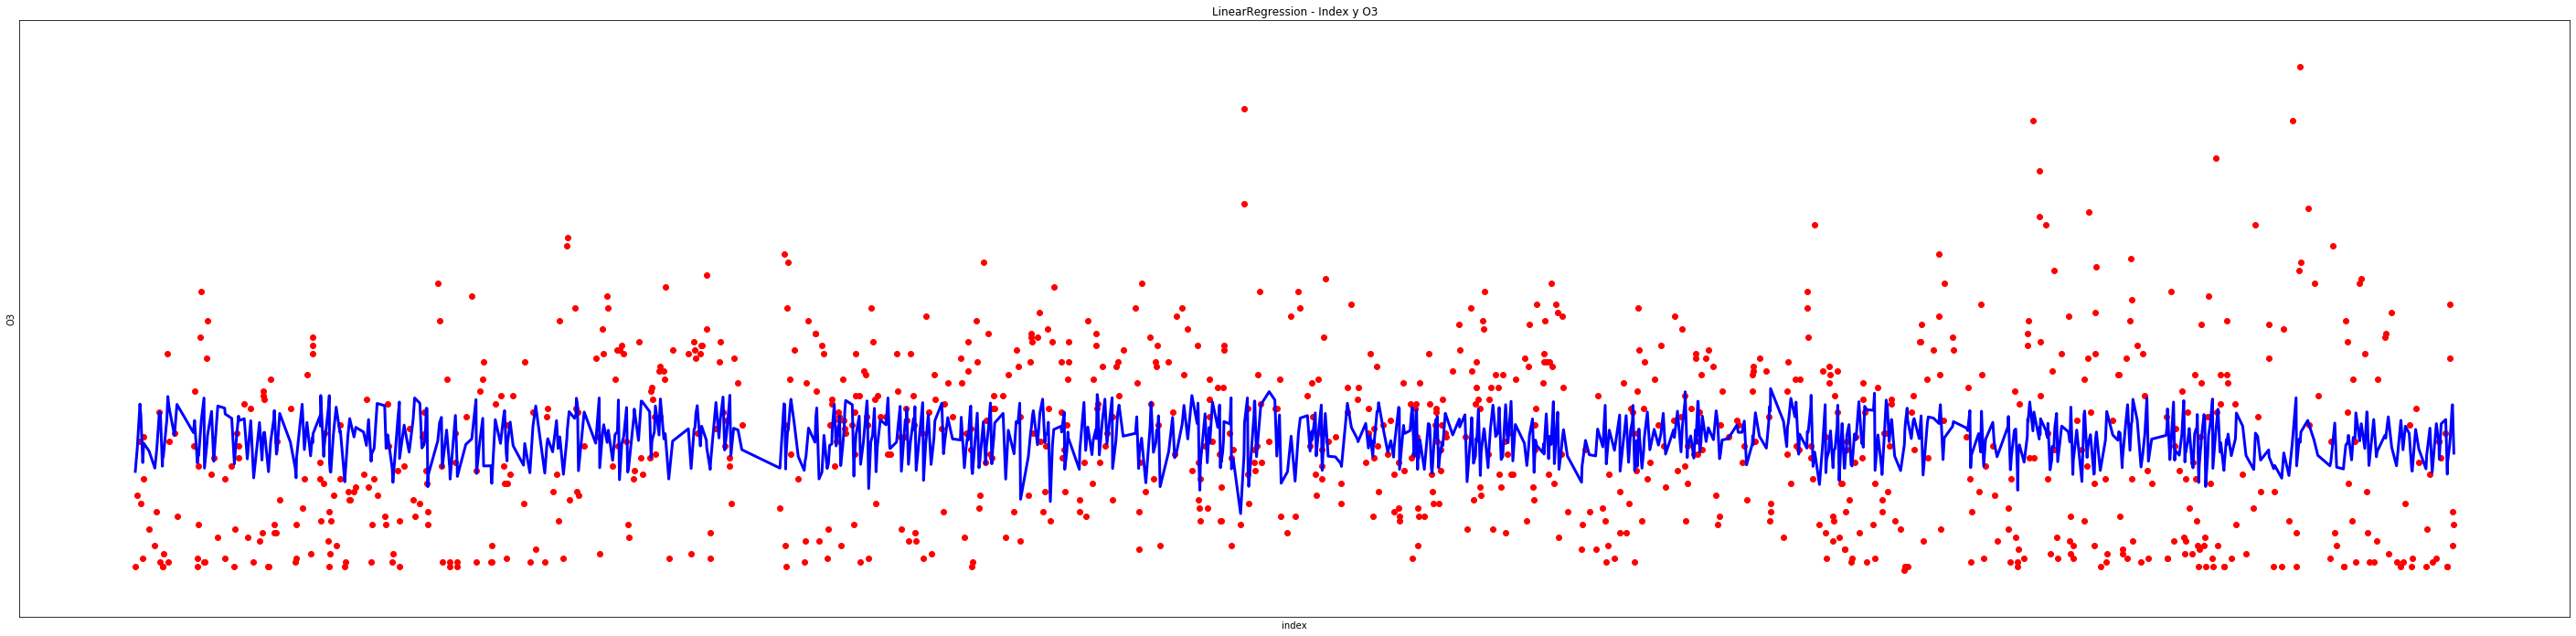

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
266 Mean squared error: 0.00034
266 Coefficient of determination: 0.20058


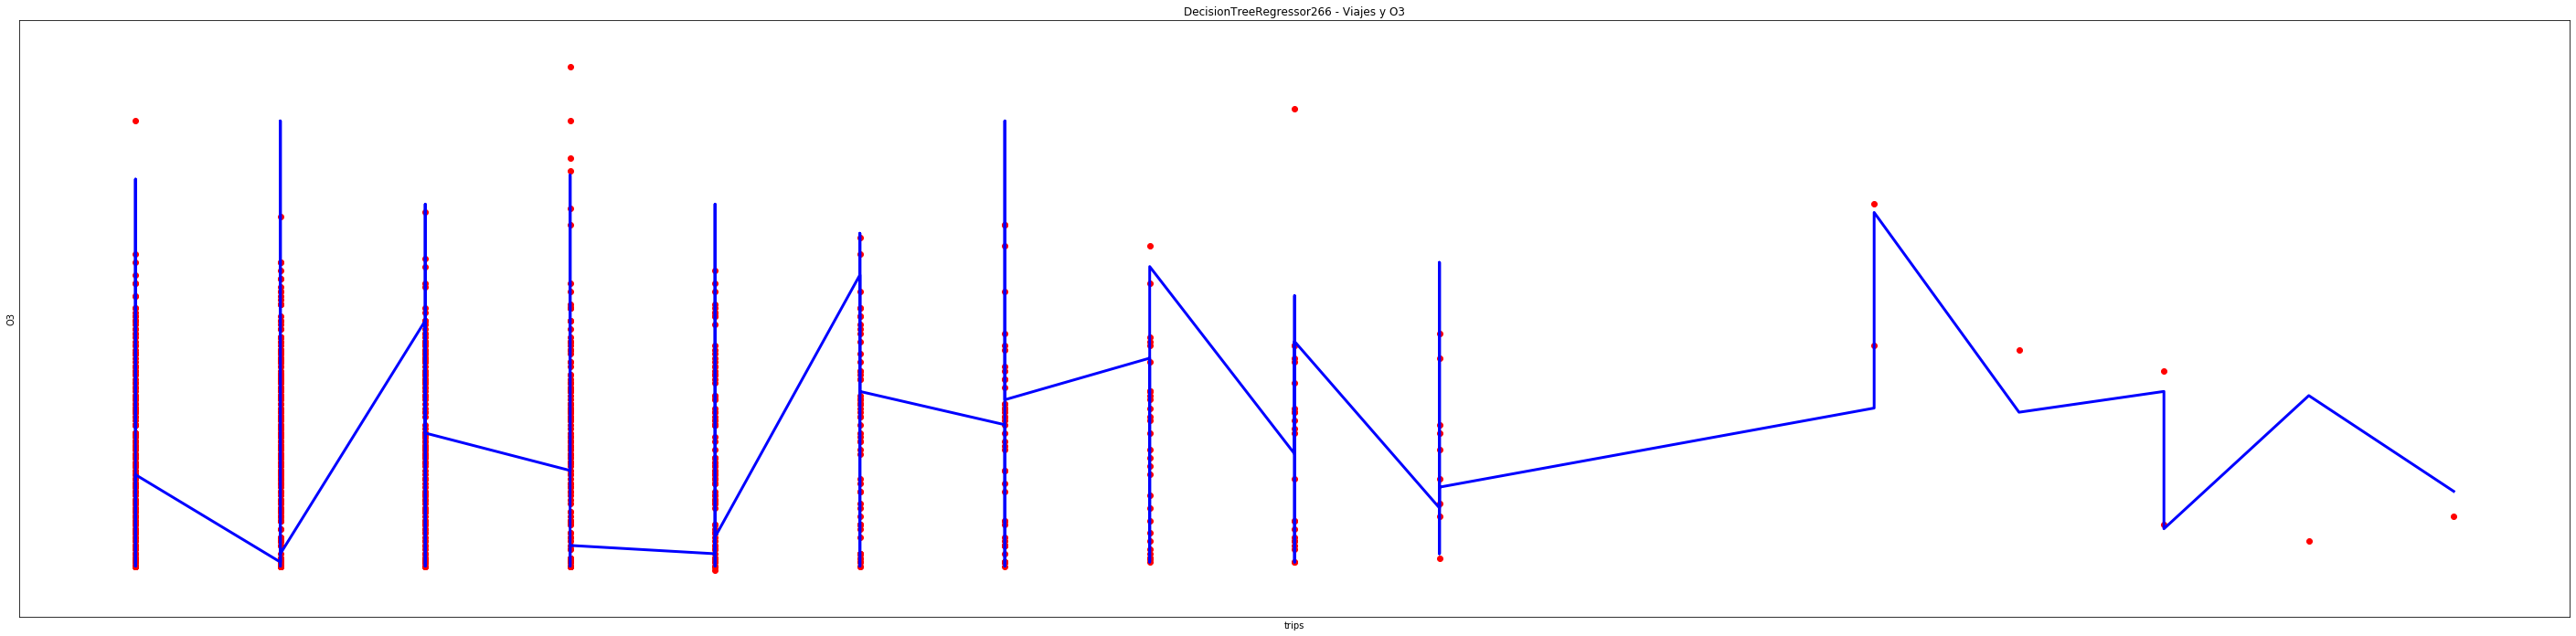

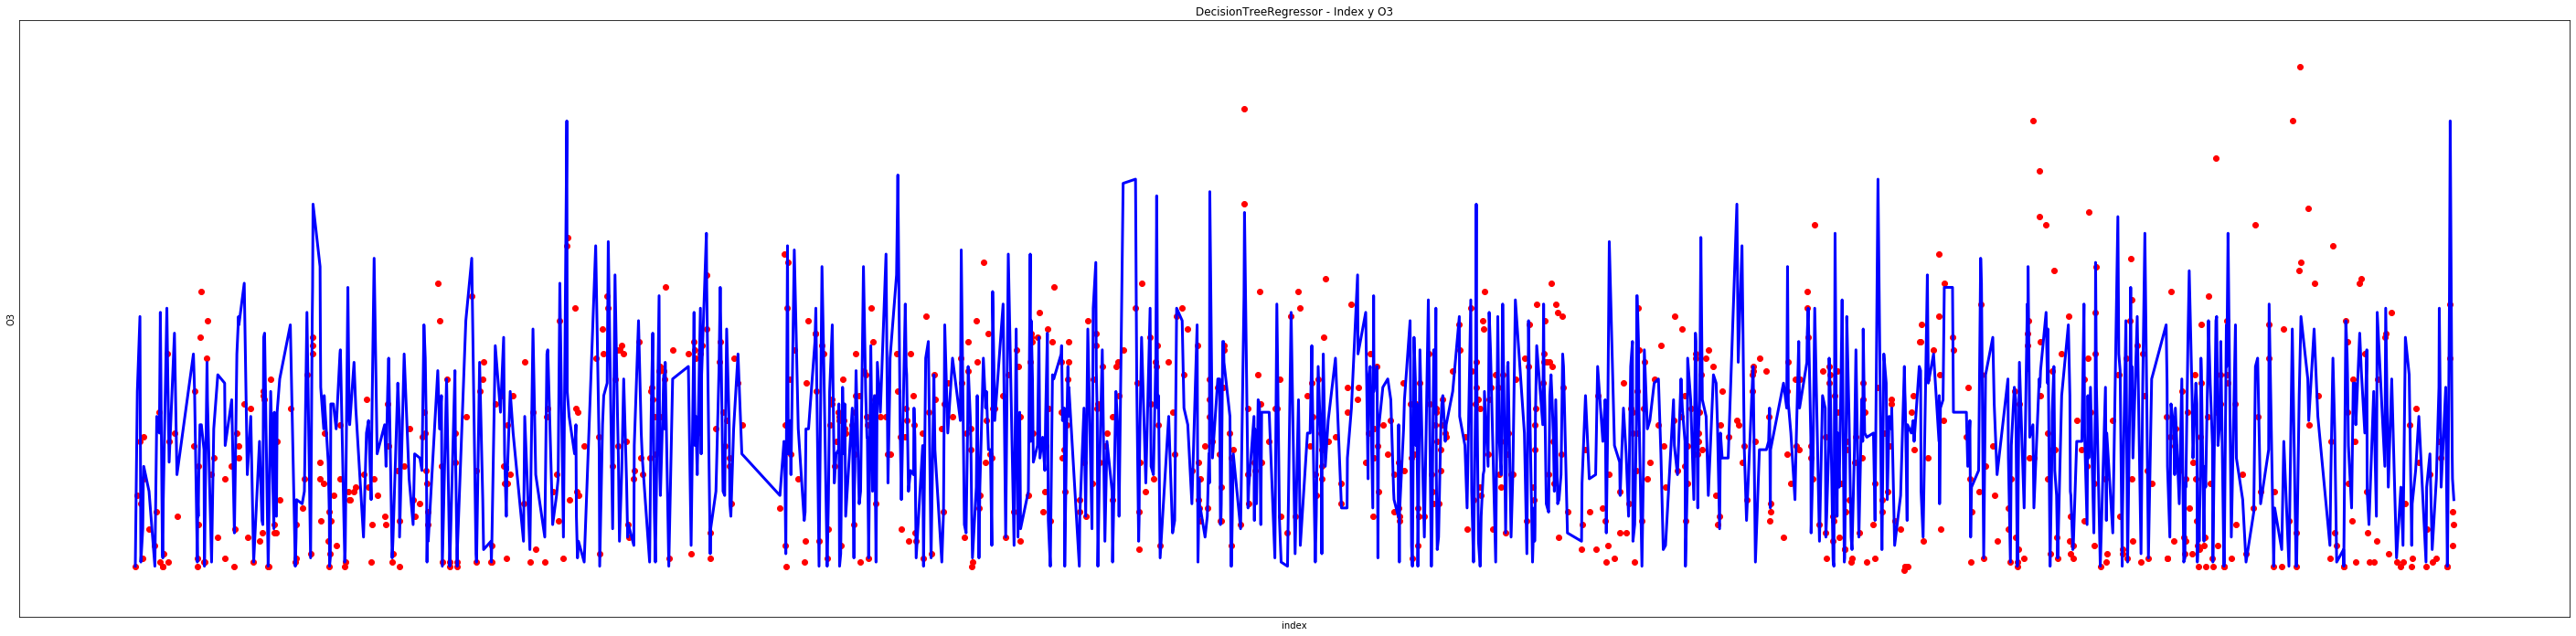

----------------------------------------------------MLPRegressor----------------------------------------------------
266 Mean squared error: 663.59159
266 Coefficient of determination: -1577927.71808


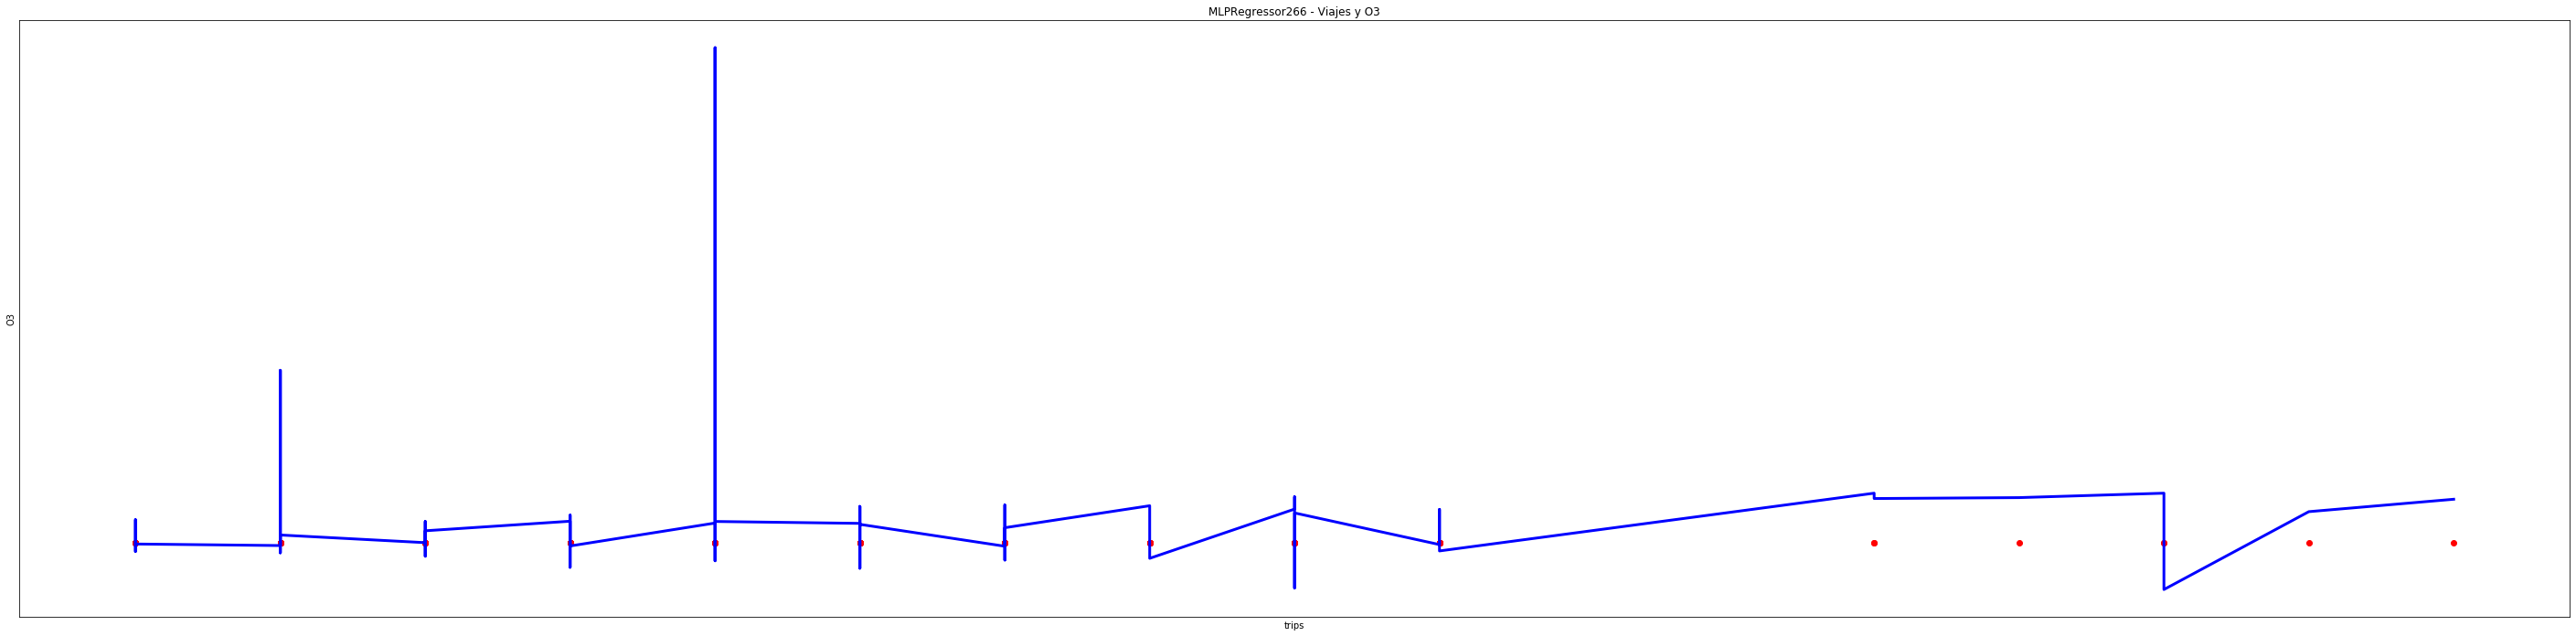

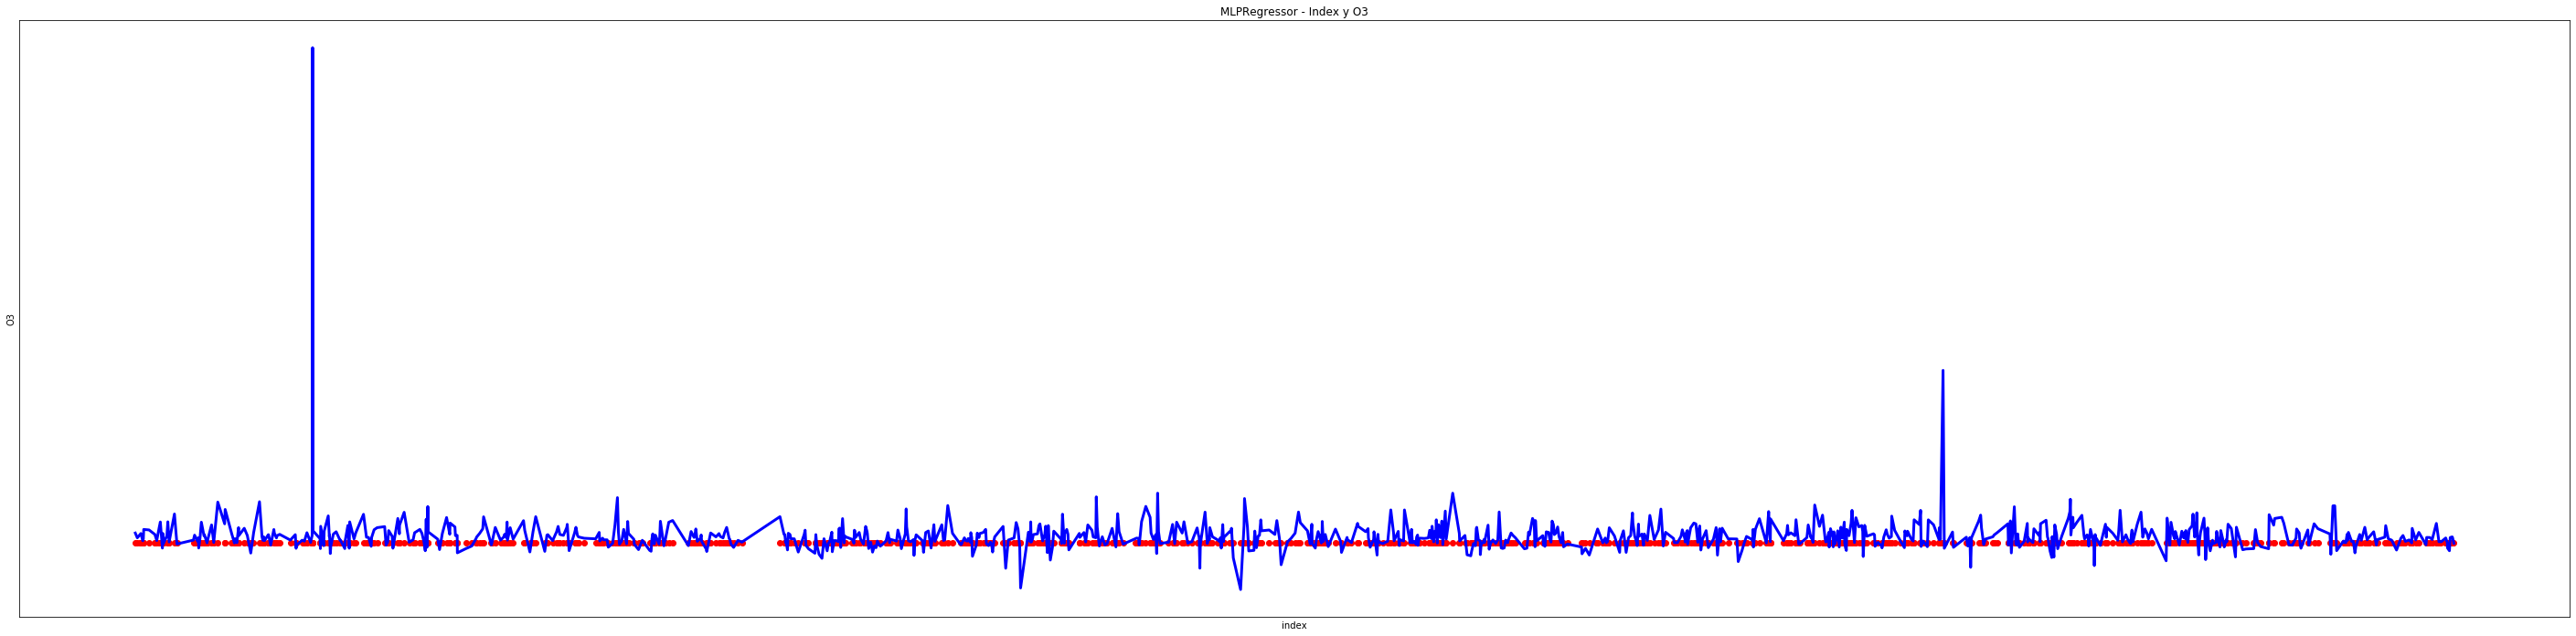

In [30]:
#Get top 5 stations
df_station = df.bike_station_id.value_counts().rename_axis('bike_station_id').reset_index(name='counts')
top5_stations_id = df_station.nlargest(5,"counts")["bike_station_id"]
 
# modebs by bike station (top 5 stations with more trips)
for station_id in top5_stations_id:
    df_top = df.query('bike_station_id == ' + str(station_id))
    df_top = df_top[['HORA', 'trips', 'trip_distance', 'trip_duration', metric]]
    if display_graphs == True:
        pd.plotting.scatter_matrix(df_top, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
        plt.show()
        f, ax = plt.subplots(figsize=(10, 8))
        corr = df_top.corr()
        sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

    train_top, test_top = train_test_split(df_top, test_size=0.2)
    models_top = []
    models_top.append(('LinearRegression', linear_model.LinearRegression()))
    models_top.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
    models_top.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
    results = []
    names = []
    for name, model in models_top:
        test_top.sort_values(by='trips', ascending=True, inplace=True)
        model.fit(train_top.drop(metric, axis=1), train_top[metric])
        y_pred = model.predict(test_top.drop(metric, axis=1))
        print(f'----------------------------------------------------{name}----------------------------------------------------')
        if(name == 'LinearRegression'):
            print(str(station_id) + ' Coefficients: \n', regr.coef_)
        print(str(station_id) + ' Mean squared error: %.5f'% mean_squared_error(test_top[metric], y_pred))
        print(str(station_id) + ' Coefficient of determination: %.5f'% r2_score(test_top[metric], y_pred))
        plt.scatter(test_top['trips'], test_top[metric],  color='red')
        plt.plot(test_top['trips'], y_pred , color='blue', linewidth=3)
        plt.xticks(())
        plt.yticks(())
        plt.xlabel('trips')
        plt.ylabel(metric)
        plt.title(name + str(station_id) + ' - Viajes y ' + metric )
        plt.rcParams["figure.figsize"] = (50,12)
        plt.show()

        test_top = test_top.sort_index(axis = 0) 
        y_pred = model.predict(test_top.drop(metric, axis=1))
        # Plot outputs
        plt.scatter(test_top.index, test_top[metric],  color='red')
        plt.plot(test_top.index, y_pred , color='blue', linewidth=3)
        plt.xticks(())
        plt.yticks(())
        plt.xlabel('index')
        plt.ylabel(metric)
        plt.title(name + ' - Index y ' + metric )
        plt.rcParams["figure.figsize"] = (50,12)
        plt.show()    
    